In [1]:
# local에서 연결 시 재시작 전에 'remote-ssh connect to host'에서 ssh구성을 suyeon kim 경로로 선택하고 실행
#%pip install jupyter
#%pip install ipykernel
#%pip install pandas
#%pip install seaborn 
#%pip install matplotlib 
#%pip install sklearn
#%pip install category_encoders
#%pip install eli5
#%pip install xgboost
#%pip install lightgbm
#%pip install imblearn
#%pip install pdpbox

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score


from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from eli5.sklearn import PermutationImportance
from scipy.stats.distributions import uniform
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot

# col 생략 없이 출력
pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'pdpbox'

In [3]:
df = pd.read_csv('C:/Users/suyeon kim/Downloads/avazu-ctr-prediction/use_train_data.csv')
df_copy = df.copy()

df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.659989e+18,1,14102813,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,226c65b1,56243372,1,0,17262,320,50,1872,3,39,-1,23
1,1.346665e+19,0,14102206,1002,0,85f751fd,c4e18dd6,50e219e0,9f41cdad,7801e8d9,07d7df22,51574212,aa6b751a,021b641d,0,0,21790,320,50,2513,3,35,-1,68
2,1.108428e+19,0,14102211,1005,0,85f751fd,c4e18dd6,50e219e0,95b5e741,c6824def,cef3e649,a99f214a,2abc5b96,b0b26233,1,0,20277,320,50,2281,3,47,100181,42
3,7.072910e+18,0,14102304,1005,0,85f751fd,c4e18dd6,50e219e0,28d3bd59,b8d325c3,0f2161f8,a99f214a,a12e3f89,24f6b932,1,0,22114,320,50,2547,2,35,100233,13
4,5.385654e+18,0,14102514,1005,0,85f751fd,c4e18dd6,50e219e0,92f5800b,ae637522,0f2161f8,a99f214a,9df39846,981edffc,1,3,21191,320,50,2424,1,161,100191,71


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16171586 entries, 0 to 16171585
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 2.9+ GB


In [5]:
df.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [6]:
df.nunique()


id                  16171586
click                      2
hour                     240
C1                         7
banner_pos                 7
site_id                 4210
site_domain             6133
site_category             24
app_id                  6996
app_domain               433
app_category              33
device_id            1456979
device_ip            4095673
device_model            7476
device_type                5
device_conn_type           4
C14                     2565
C15                        8
C16                        9
C17                      433
C18                        4
C19                       68
C20                      170
C21                       60
dtype: int64

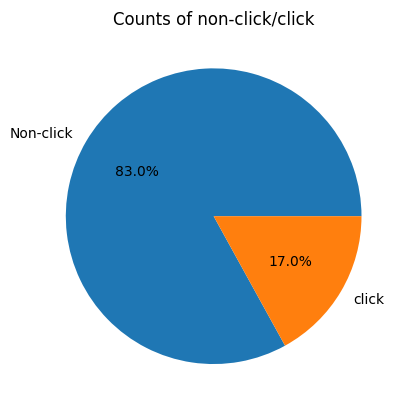

In [7]:
plt.pie(df.click.value_counts(normalize=True), labels=['Non-click','click'], autopct='%.1f%%')
plt.title('Counts of non-click/click')
plt.show();

In [75]:
df.click.value_counts()

0    13425560
1     2746026
Name: click, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

target = 'click'

train_val, test = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42)
train, val = train_test_split(train_val, test_size=0.2, stratify=train_val[target], random_state=42)

print(train.shape, val.shape, test.shape)

(10349814, 24) (2587454, 24) (3234318, 24)


In [9]:
def feature_engineering(df):
    
    # 날짜, 시간 포맷팅
    df['hour'] = pd.to_datetime(df['hour'],format='%y%m%d%H')
    # 요일, 시간 추출
    # 요일 0~6(월~일)로 표시 / 시간은 24시간 기준
    df['Day_of_week'] = [x.dayofweek for x in df['hour']]
    df['Time_of_day'] = [x.hour for x in df['hour']]
    
    return df

In [10]:
train = feature_engineering(train)
val = feature_engineering(val)
test = feature_engineering(test)

In [11]:
train.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,Day_of_week,Time_of_day
3175483,1.327104e+19,0,2014-10-21 17:00:00,1010,1,85f751fd,c4e18dd6,50e219e0,d1e438f6,7801e8d9,0f2161f8,250d1d77,803715f7,a5fbe35d,4,0,17875,320,50,2036,3,47,-1,156,1,17
13066898,6.296806e+17,0,2014-10-28 14:00:00,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,cc9858ab,6d44e29a,1,0,18858,320,50,1882,3,35,-1,13,1,14
6997095,1.045719e+19,0,2014-10-25 10:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,110ed063,b4b19c97,1,0,21611,320,50,2480,3,297,100111,61,5,10
15775959,1.658073e+19,0,2014-10-26 03:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,0f2161f8,a99f214a,699f69bd,1b13b020,1,0,16688,320,50,1873,3,39,-1,23,6,3
14557853,5.857047e+18,0,2014-10-21 06:00:00,1005,1,178a7b89,b4598159,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,6534d06b,6e1e2240,1,0,16208,320,50,1800,3,167,100075,23,1,6


In [12]:
features = train.drop(target, axis=1).columns
features

Index(['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'Day_of_week',
       'Time_of_day'],
      dtype='object')

In [13]:
X_train, y_train = train[features], train[target]
X_val, y_val = val[features], val[target]
X_test, y_test = test[features], test[target]

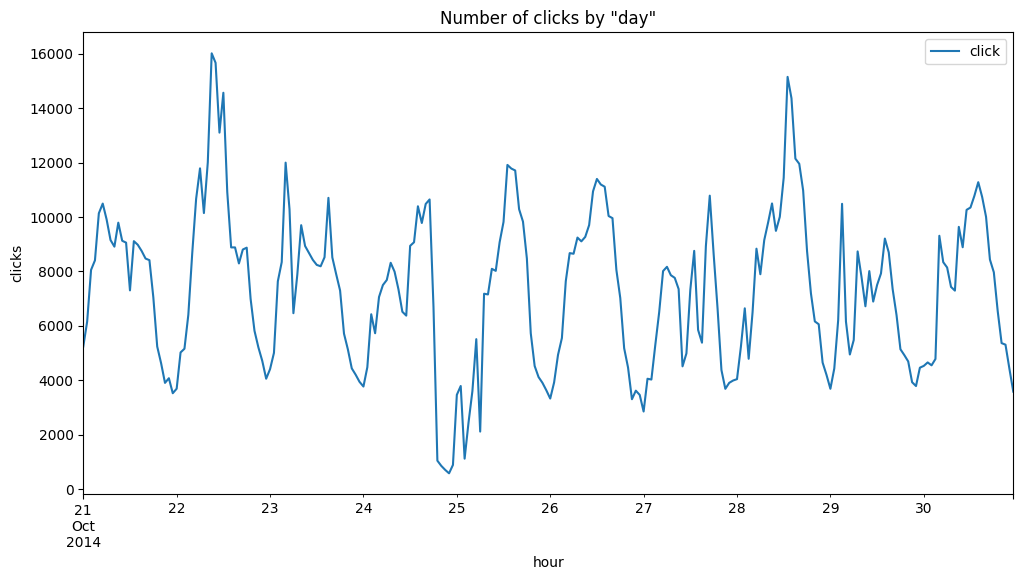

In [14]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('clicks')
plt.title('Number of clicks by "day"');

In [15]:
# 22일, 28일 낮 시간에 클릭이 많았음
# 25일 자정 쯤이 가장 낮았음

In [16]:
def clicks_visualization(feature):
        plt.rcParams['axes.grid'] = True 

        train.groupby(feature).agg({'click':'sum'}).plot(figsize=(12,6))
        plt.xticks(train[feature].unique())
        plt.ylabel('clicks')
        plt.title(f'Number of clicks by {feature}')
        
        return plt.show();

def ctr_visualization(feature):
        ctr = train.groupby(feature).click.count().to_frame()
        ctr['click_1'] = train[train.click==1].groupby(feature).click.sum()
        ctr.columns = ['impressions', 'clicks']
        ctr['ctr'] = ctr['clicks']/ctr['impressions']*100
        ctr = ctr.reset_index()

        plt.figure(figsize=(12,6))
        sns.barplot(y='ctr', x=feature, data=ctr, color='indigo')
        plt.title(f'{feature} CTR')
        
        return plt.show();

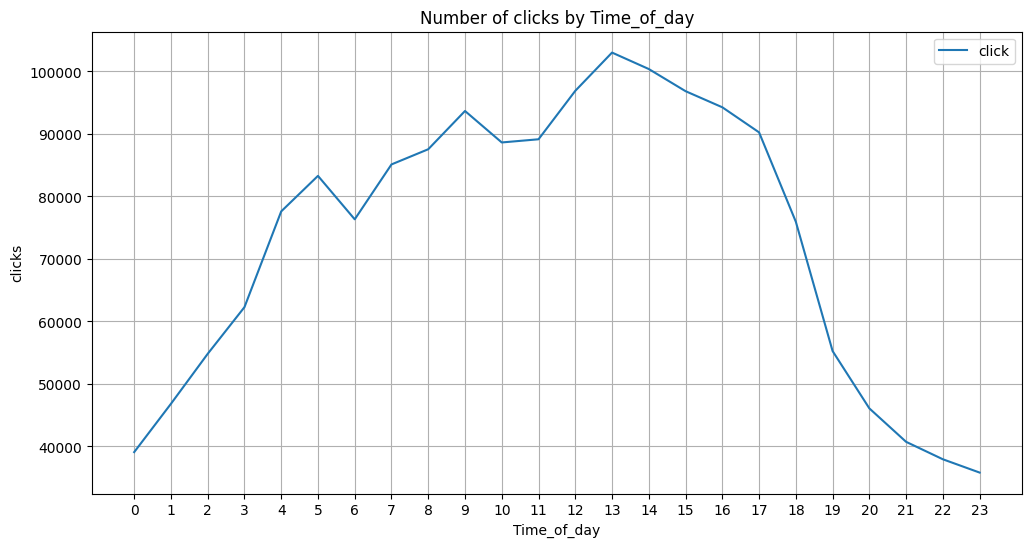

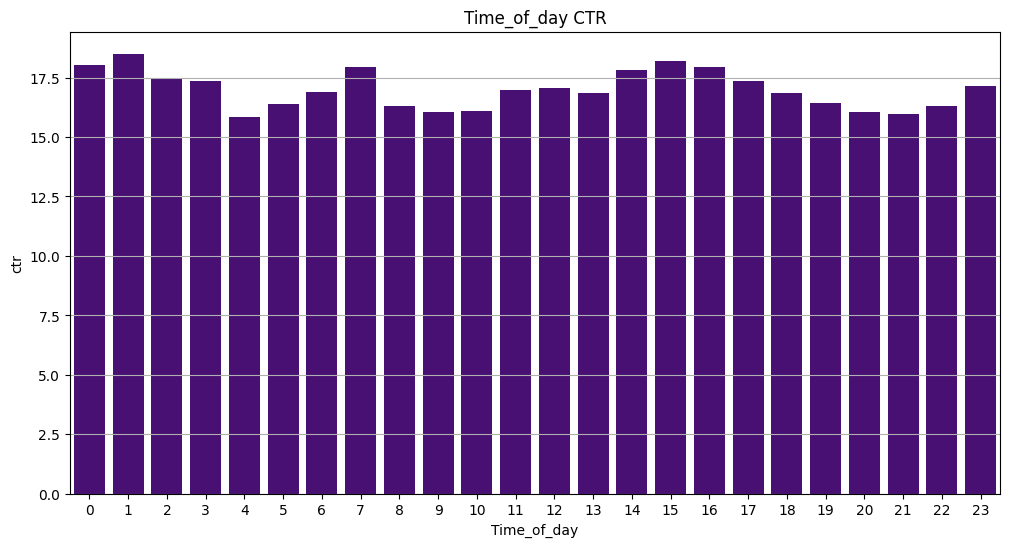

In [17]:
clicks_visualization('Time_of_day')
ctr_visualization('Time_of_day')

In [18]:
# 오후 1~2시가 가장 클릭수가 많았음
# 오후 10~자정까지 가장 낮음

# CTR로 보면 자정, 1시, 7시, 14~16시가 높음
# 자정 시간에 클릭수가 적다고 해서 해당 시간을 배제할 수 없다

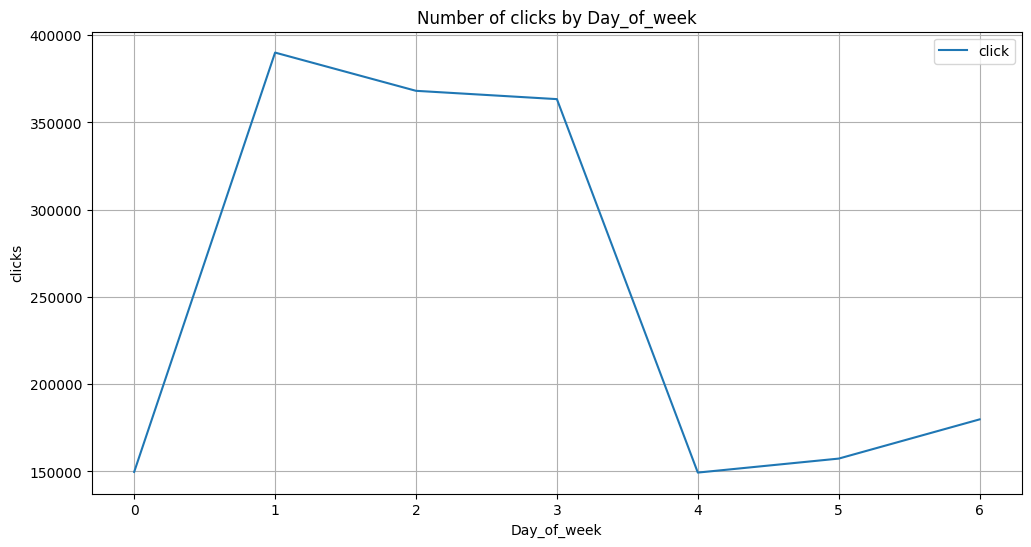

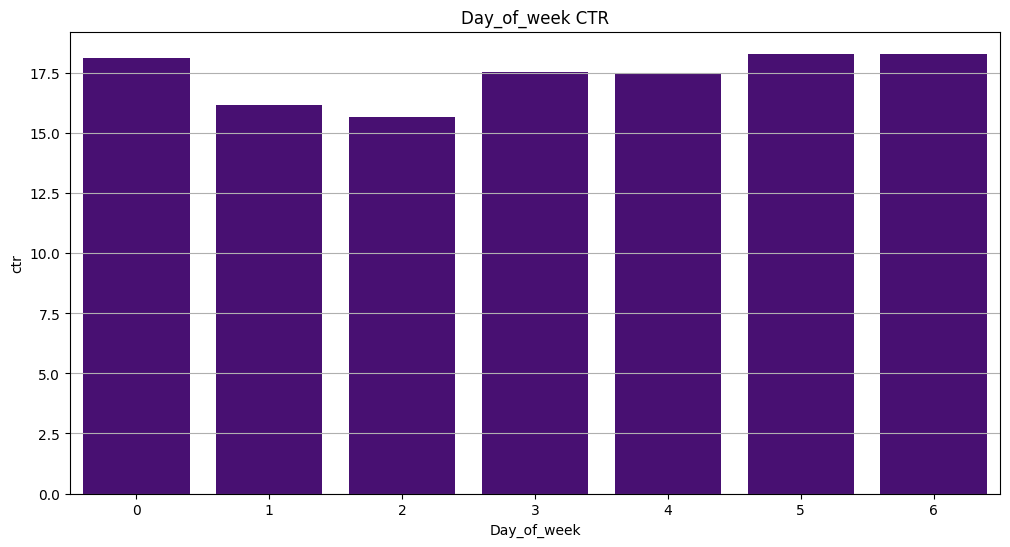

In [19]:
clicks_visualization('Day_of_week')
ctr_visualization('Day_of_week')

In [20]:
# 화~목이 가장 클릭수가 높음
# CTR로 보면 월, 토, 일요일이 높았음

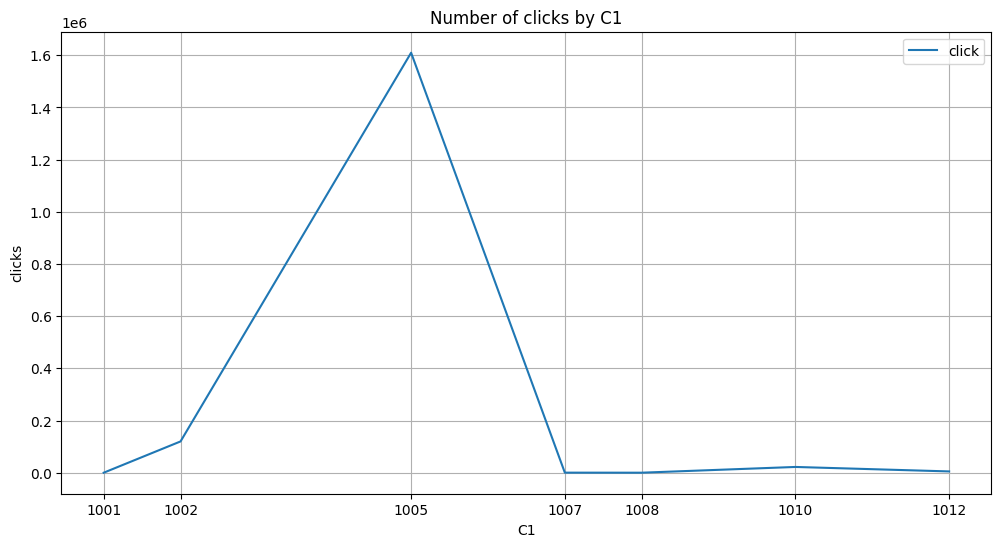

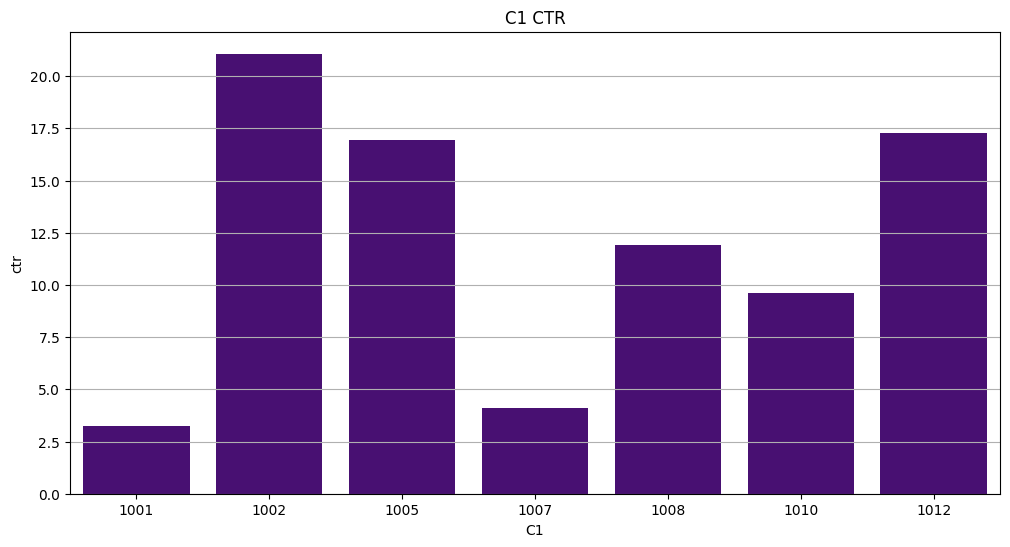

In [21]:
clicks_visualization('C1')
ctr_visualization('C1')

In [22]:
# C1의 '1005'특성이 눈에 띄게 높은 클릭수를 갖음
# CTR로 보면 오히려 1002 특성이 가장 높음

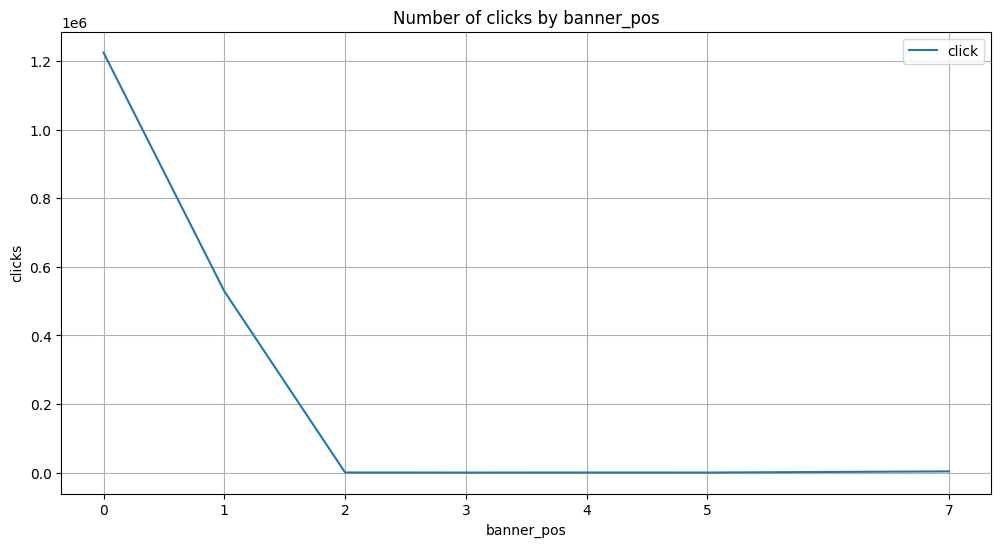

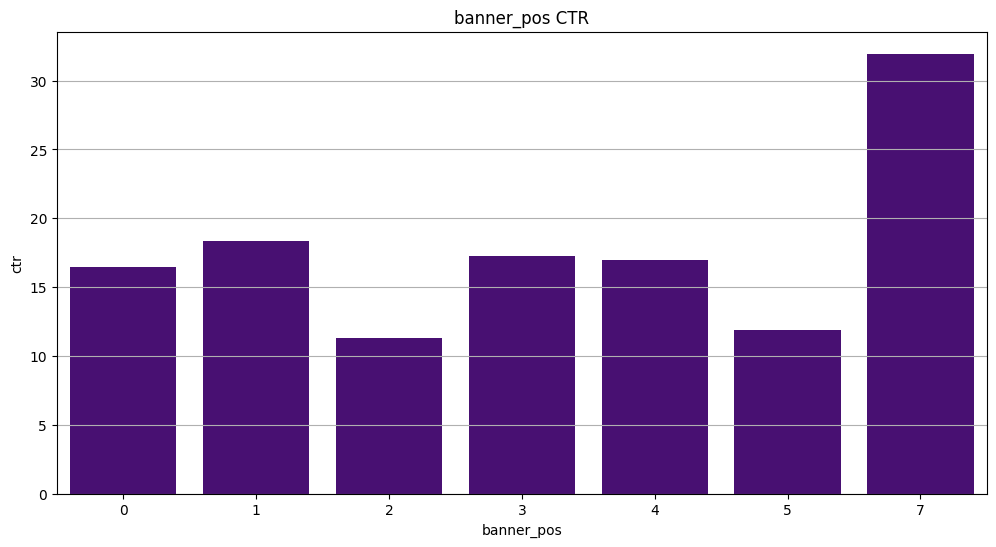

In [23]:
clicks_visualization('banner_pos')
ctr_visualization('banner_pos')

In [24]:
# 0 위치의 배너가 클릭수는 가장 많았으나 CTR로 비교하면 7 위치의 배너가 클릭률은 가장 높다

In [25]:
## site feature analysis

In [26]:
Top_10_index = []

def Top_10_clicks_visualization(feature):
        plt.rcParams['axes.grid'] = True 
        
        if train[feature].nunique() >= 10:
                Top_10 = (train.groupby(feature).agg({'click':'sum'})).click.sort_values(ascending=False)[:10]
        else: Top_10 = (train.groupby(feature).agg({'click':'sum'})).click.sort_values(ascending=False)
        
        global Top_10_index
        Top_10_index = Top_10.index
        
        plt.figure(figsize=(12,6))
        plt.xticks(range(len(Top_10_index)))
        Top_10.plot()
        plt.xticks(rotation=90);
        plt.title(f'{feature} clicks')
        plt.show();
        
        return Top_10_index
        
def Top_10_ctr_visualization(feature, Top_10_index):
        
        ctr = train.groupby(feature).click.count().to_frame()
        ctr['click_1'] = train[train.click==1].groupby(feature).click.sum()
        ctr = ctr.fillna(0)
        ctr.columns = ['impressions', 'clicks']
        ctr['ctr'] = ctr['clicks']/ctr['impressions']*100
        ctr = ctr.reset_index()        
        
        Top_10_ctr = pd.DataFrame(columns=ctr.columns)
        
        for idx in Top_10_index:
                v = ctr[ctr[feature] == idx]
                Top_10_ctr = pd.concat([Top_10_ctr,v], axis=0)

        plt.figure(figsize=(12,6))
        sns.barplot(y='ctr', x=feature, data=Top_10_ctr, color='indigo')
        plt.title(f'{feature} CTR')

        return plt.show();

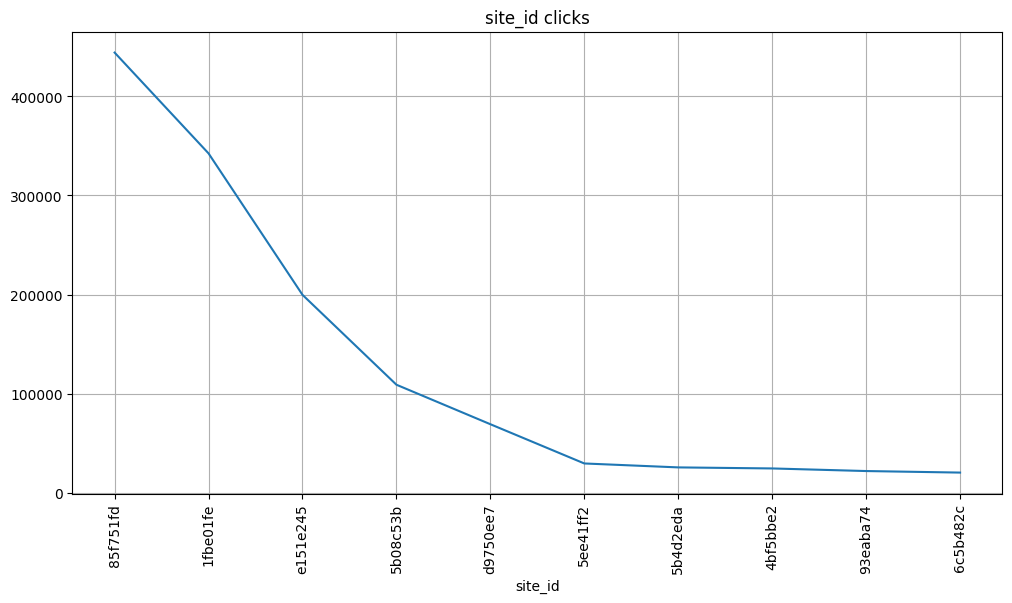

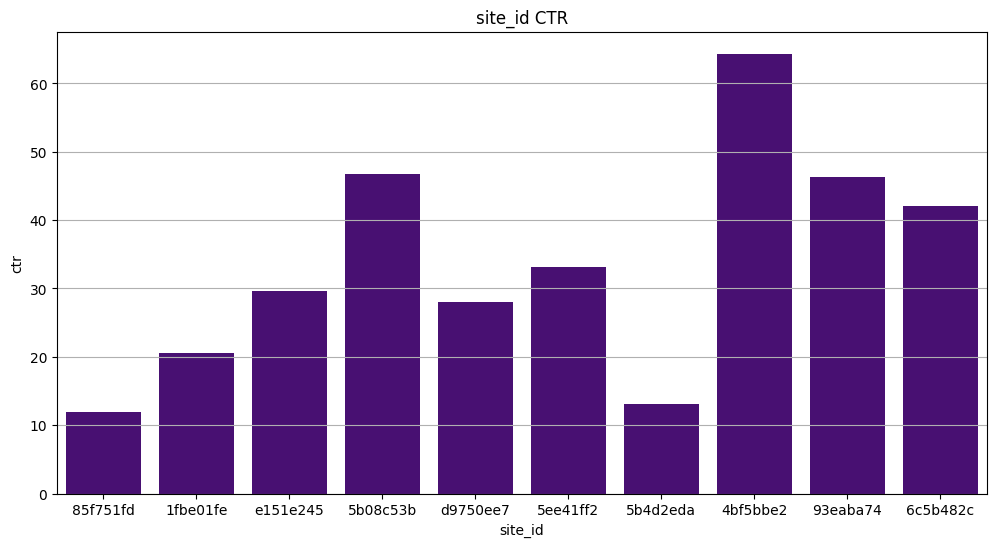

In [27]:
Top_10_clicks_visualization('site_id')
Top_10_ctr_visualization('site_id', Top_10_index)

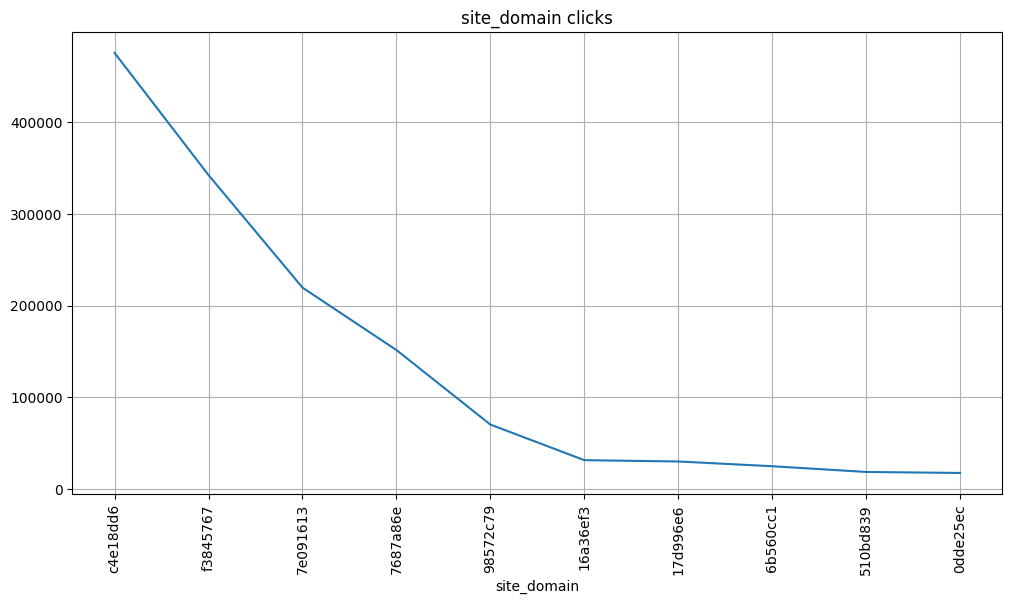

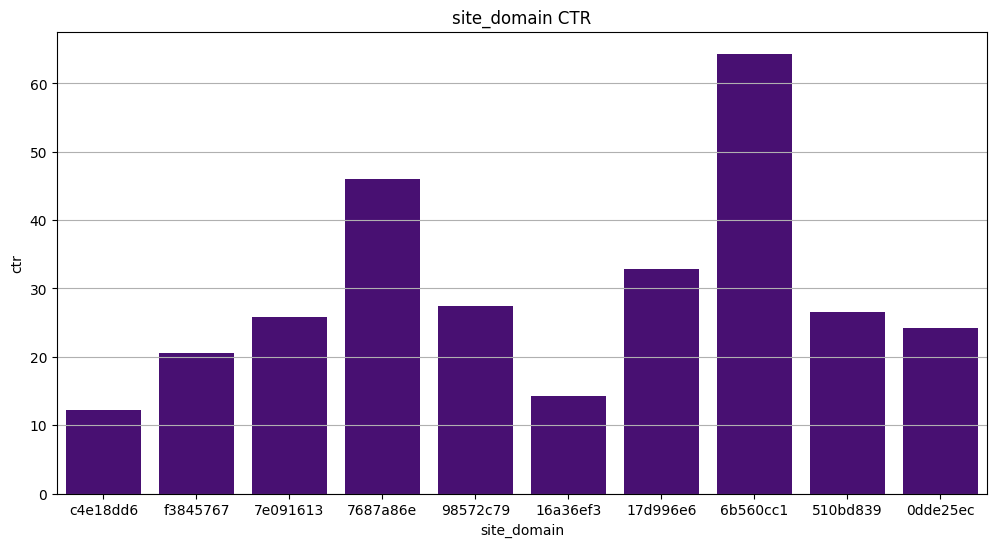

In [28]:
Top_10_clicks_visualization('site_domain')
Top_10_ctr_visualization('site_domain', Top_10_index)

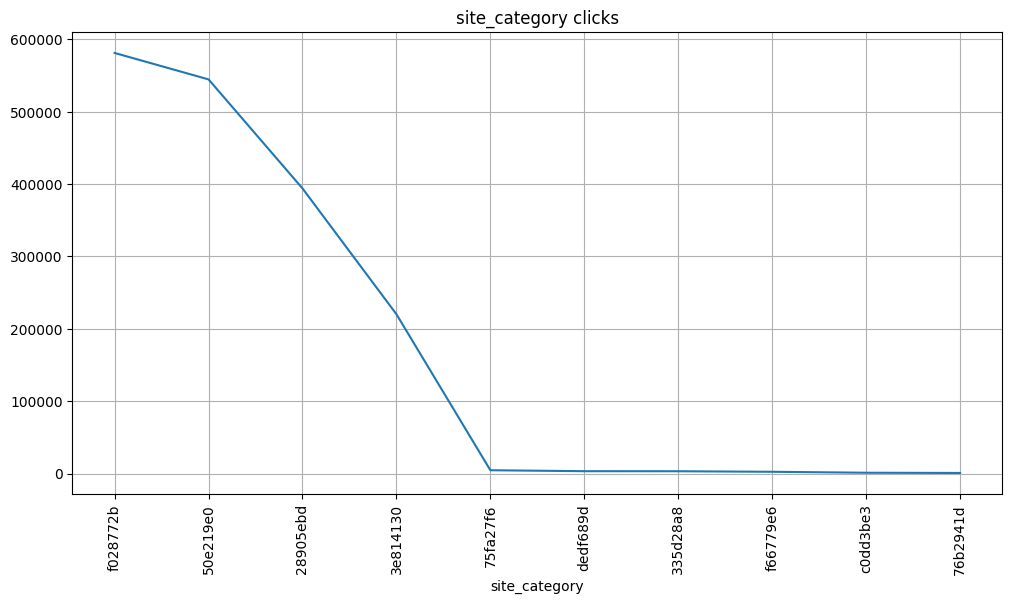

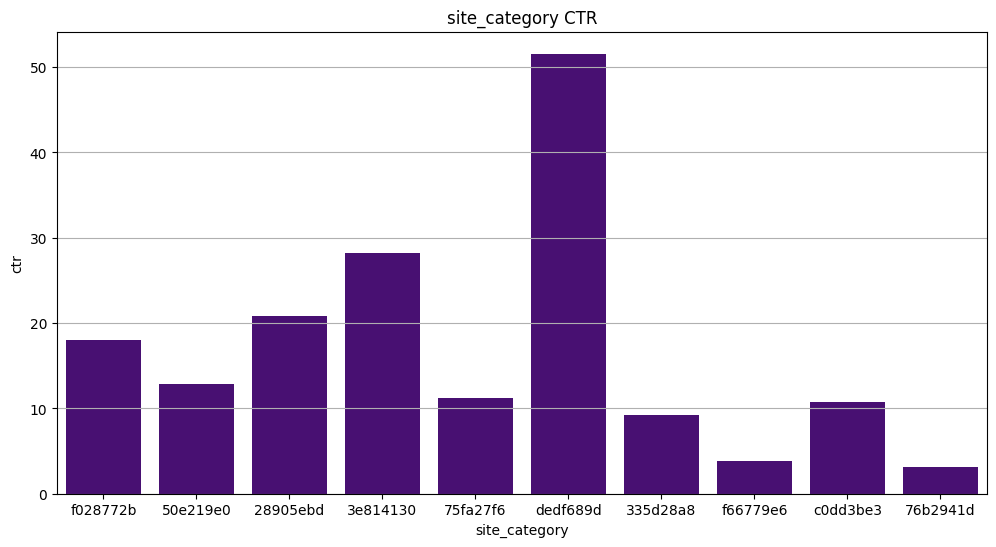

In [29]:
Top_10_clicks_visualization('site_category')
Top_10_ctr_visualization('site_category', Top_10_index)

In [30]:
## app feature analysis

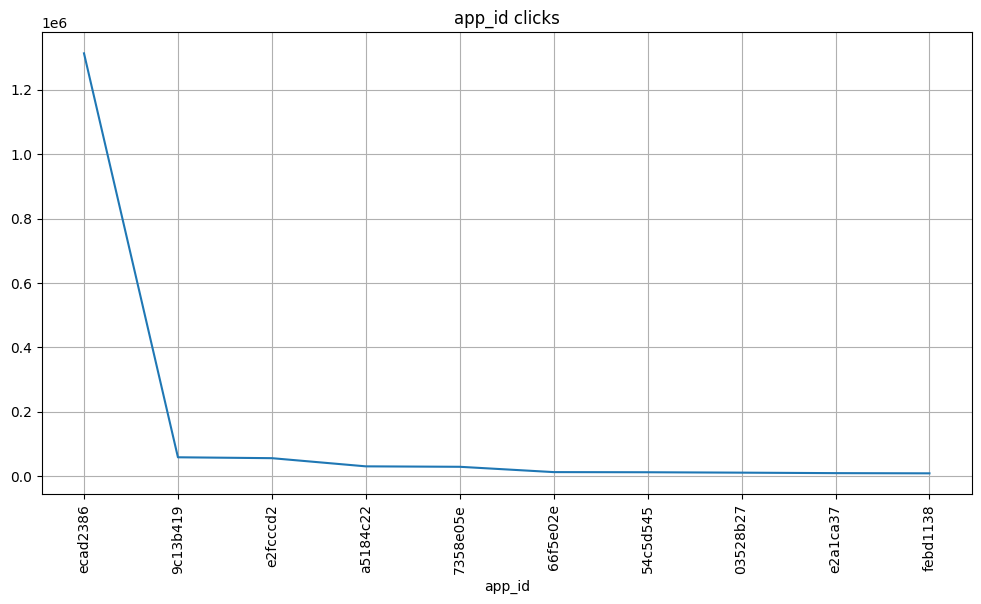

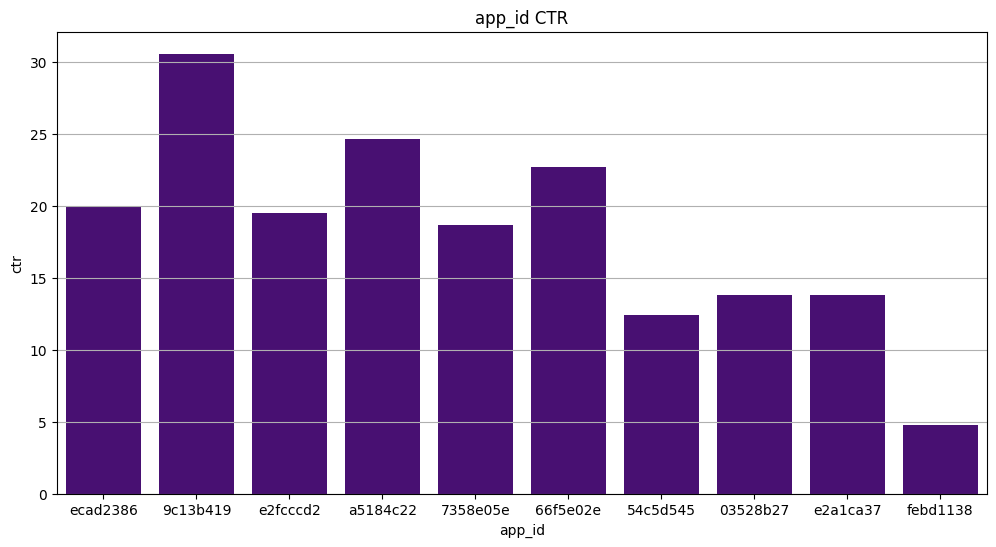

In [31]:
Top_10_clicks_visualization('app_id')
Top_10_ctr_visualization('app_id', Top_10_index)

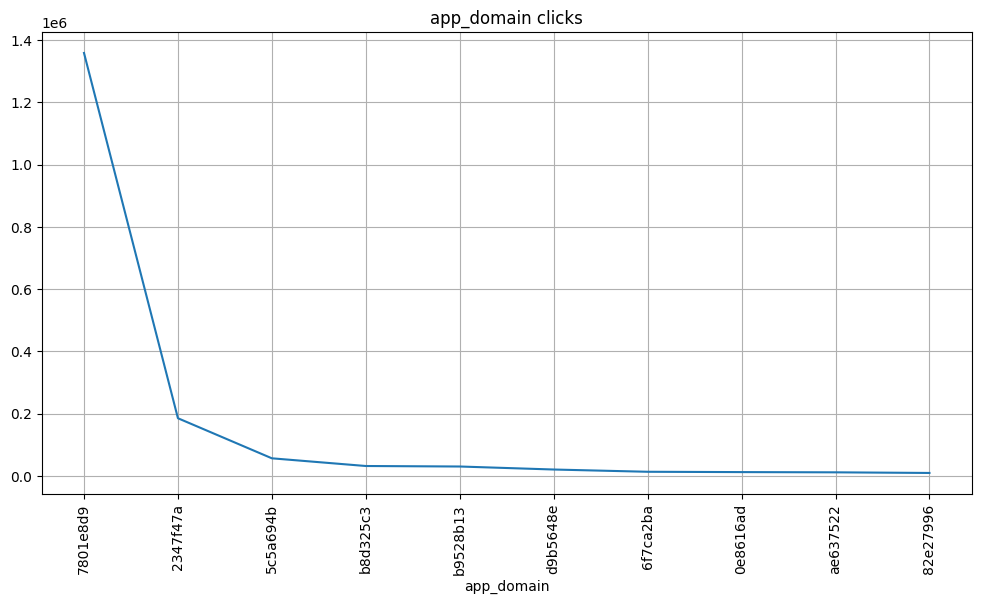

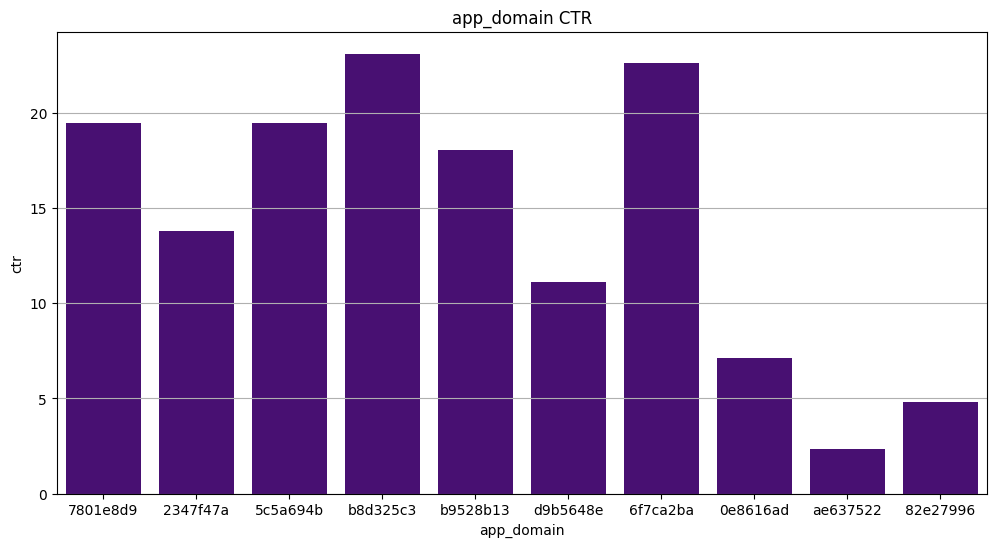

In [32]:
Top_10_clicks_visualization('app_domain')
Top_10_ctr_visualization('app_domain', Top_10_index)

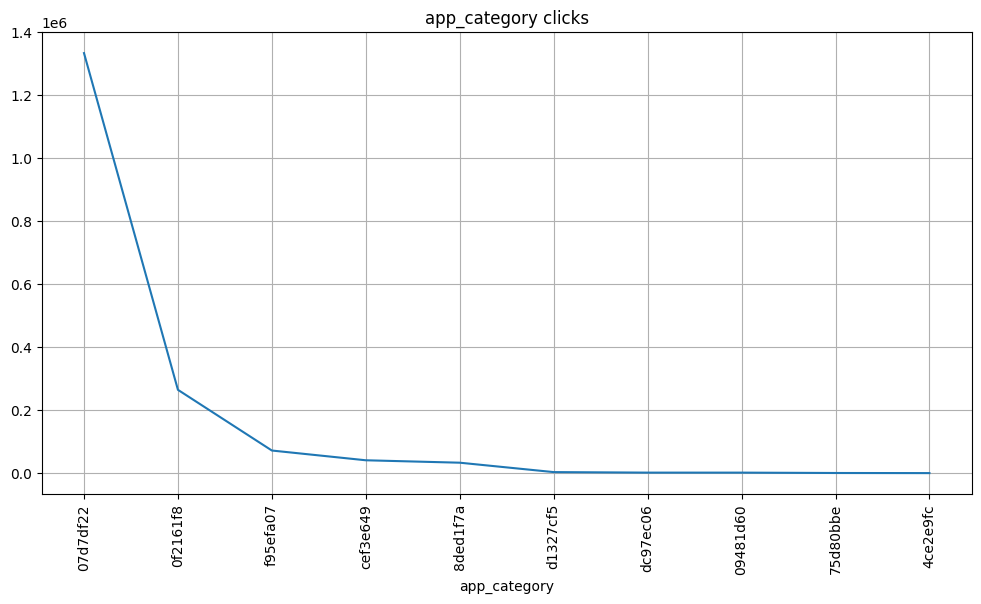

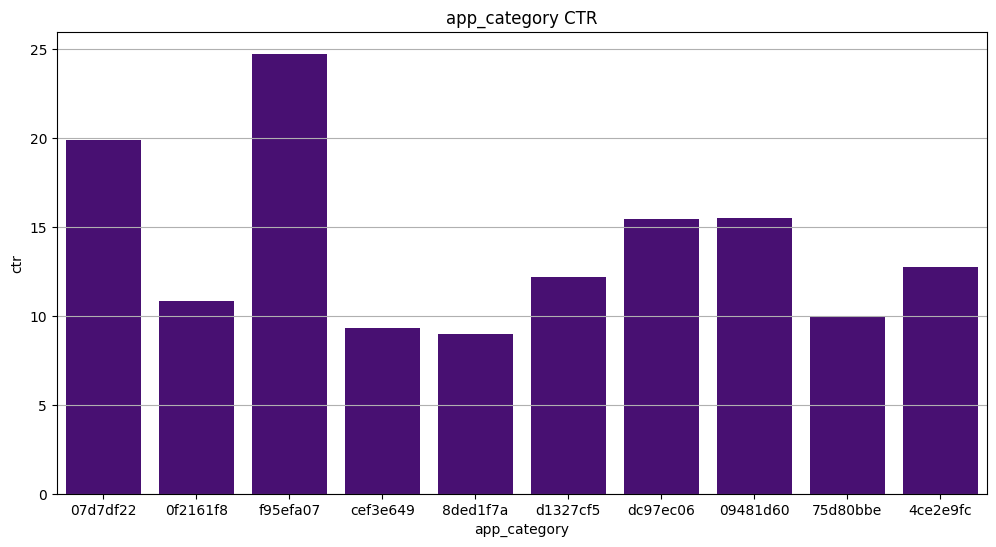

In [33]:
Top_10_clicks_visualization('app_category')
Top_10_ctr_visualization('app_category', Top_10_index)

In [34]:
## device feature analysis

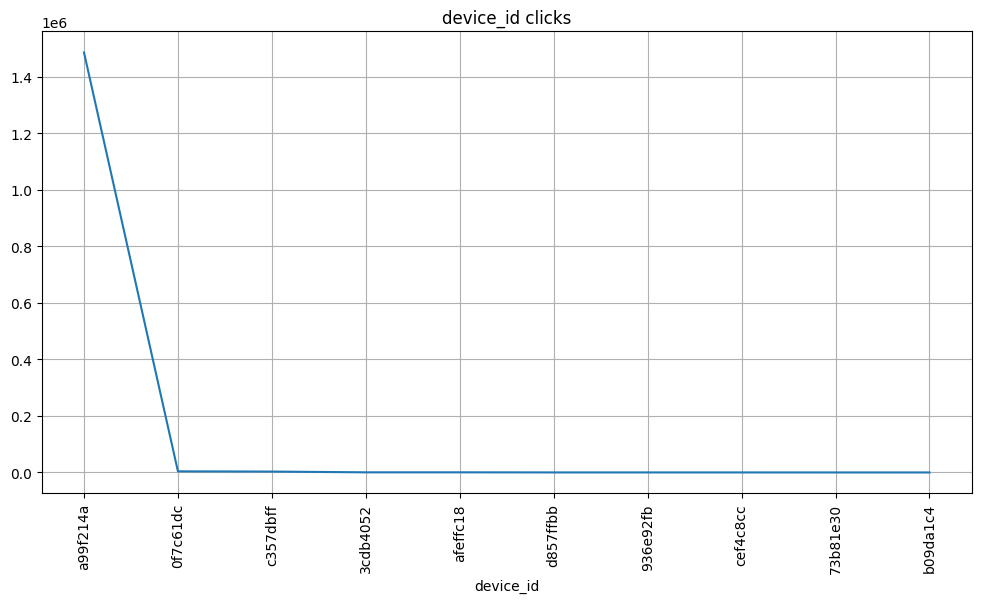

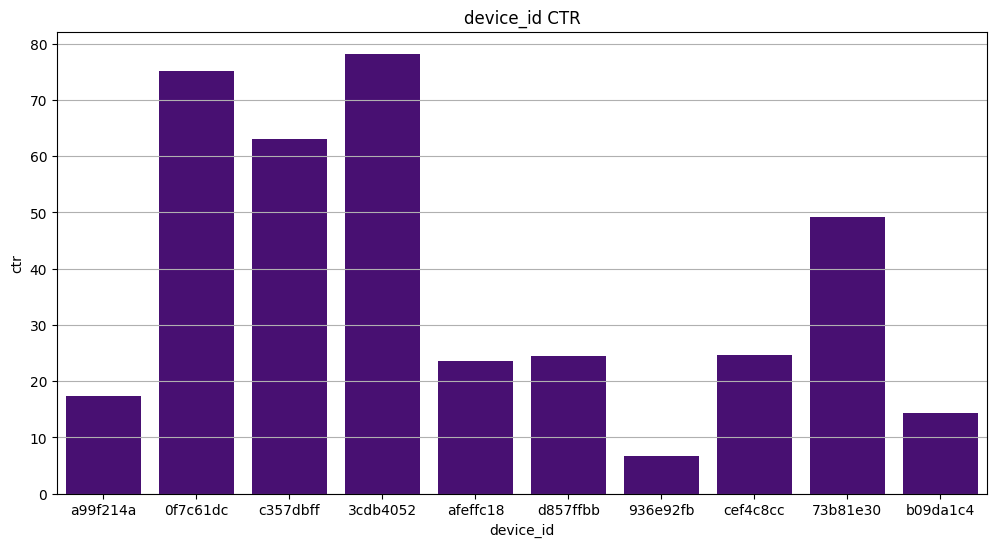

In [35]:
Top_10_clicks_visualization('device_id')
Top_10_ctr_visualization('device_id', Top_10_index)

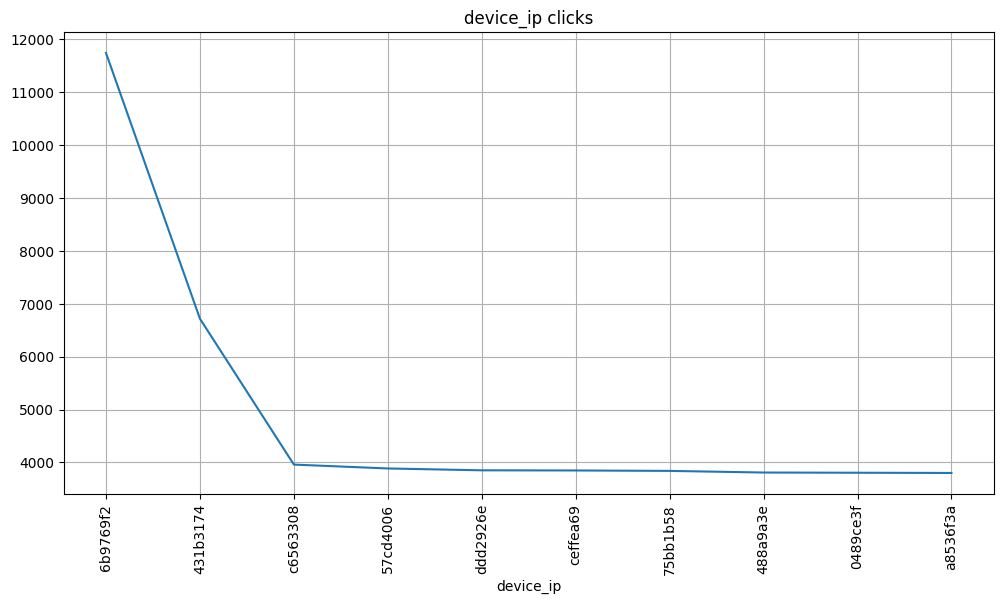

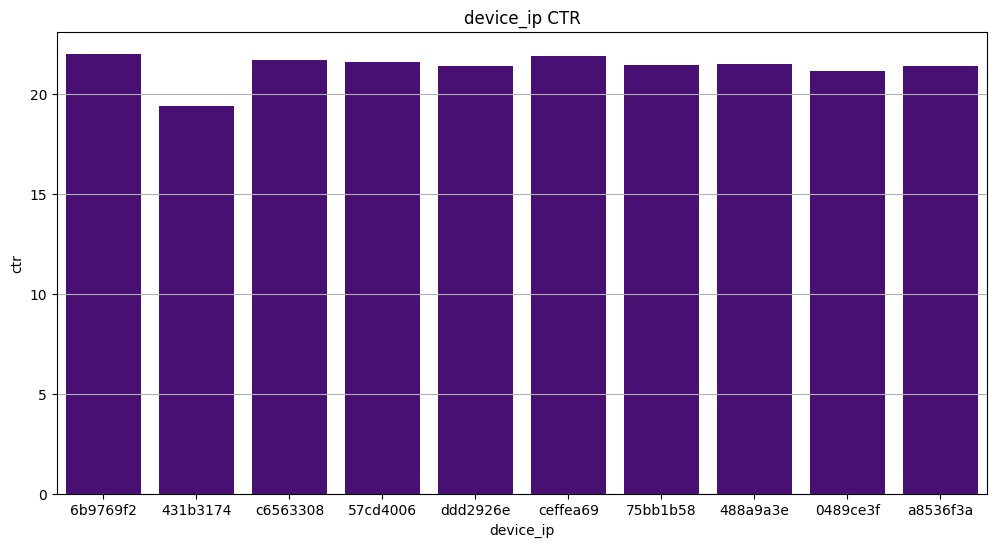

In [36]:
Top_10_clicks_visualization('device_ip')
Top_10_ctr_visualization('device_ip', Top_10_index)

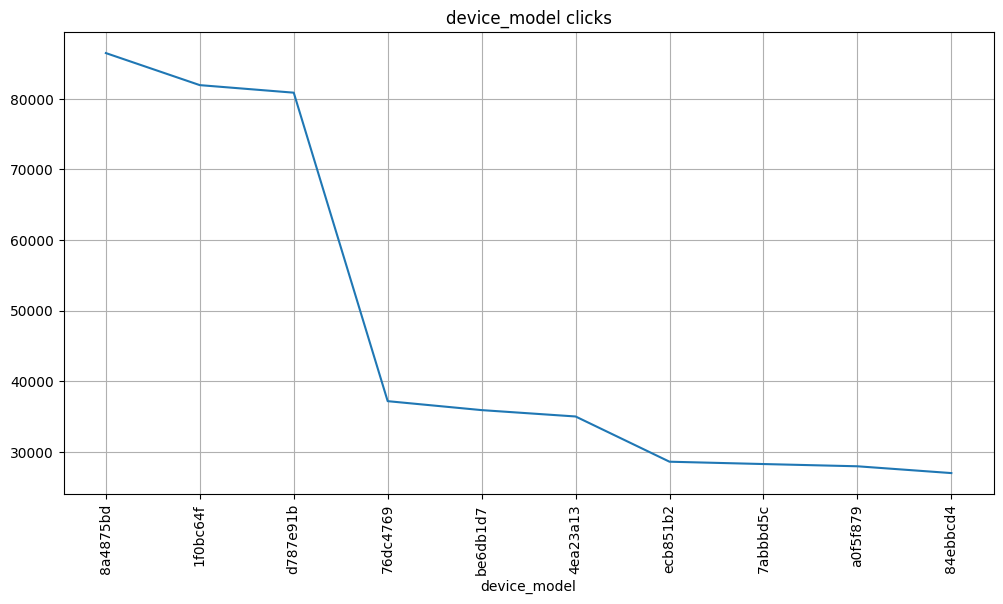

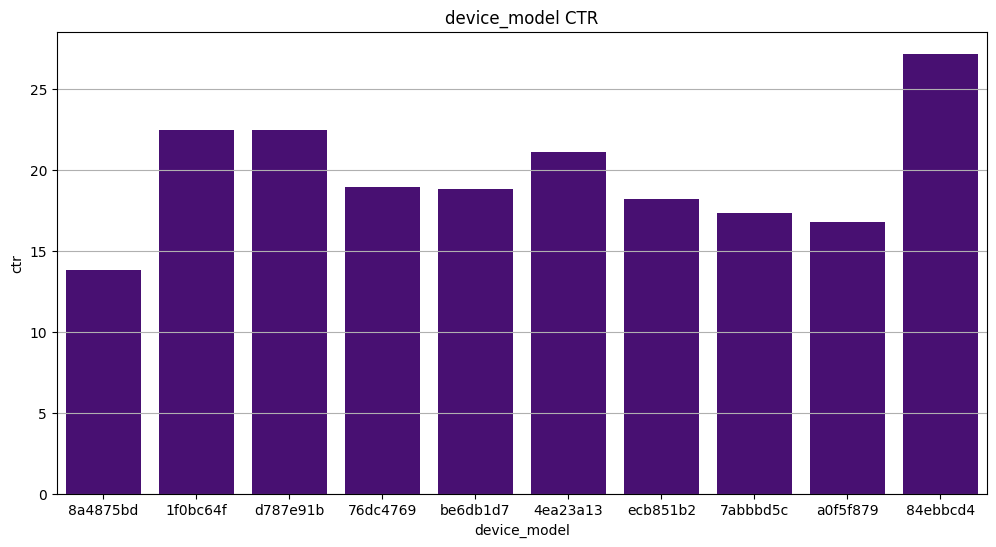

In [37]:
Top_10_clicks_visualization('device_model')
Top_10_ctr_visualization('device_model', Top_10_index)

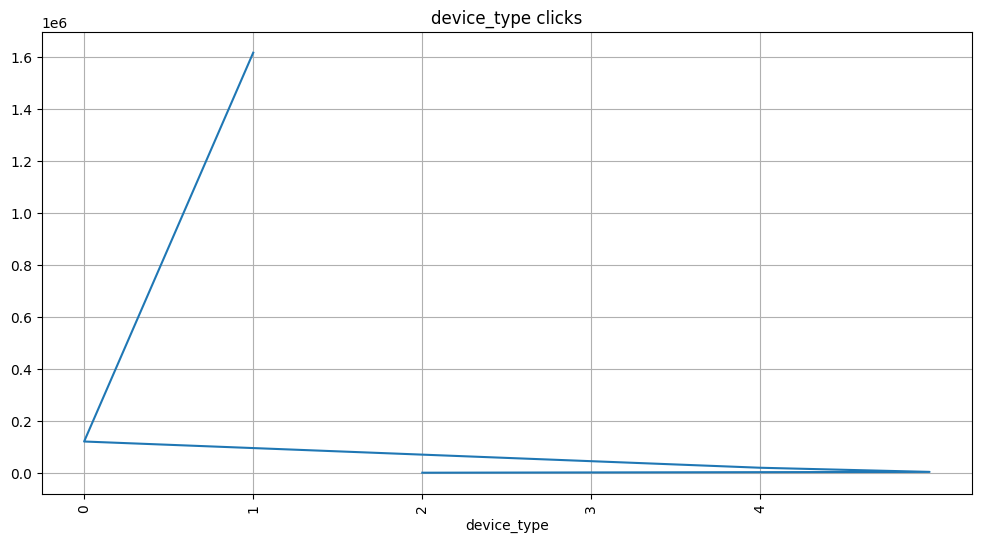

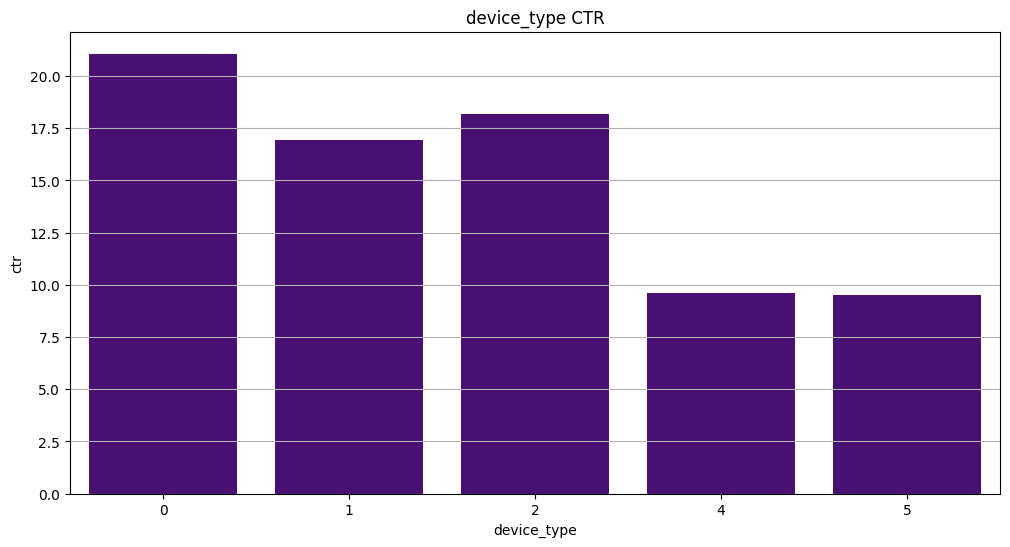

In [38]:
Top_10_clicks_visualization('device_type')
Top_10_ctr_visualization('device_type', Top_10_index)

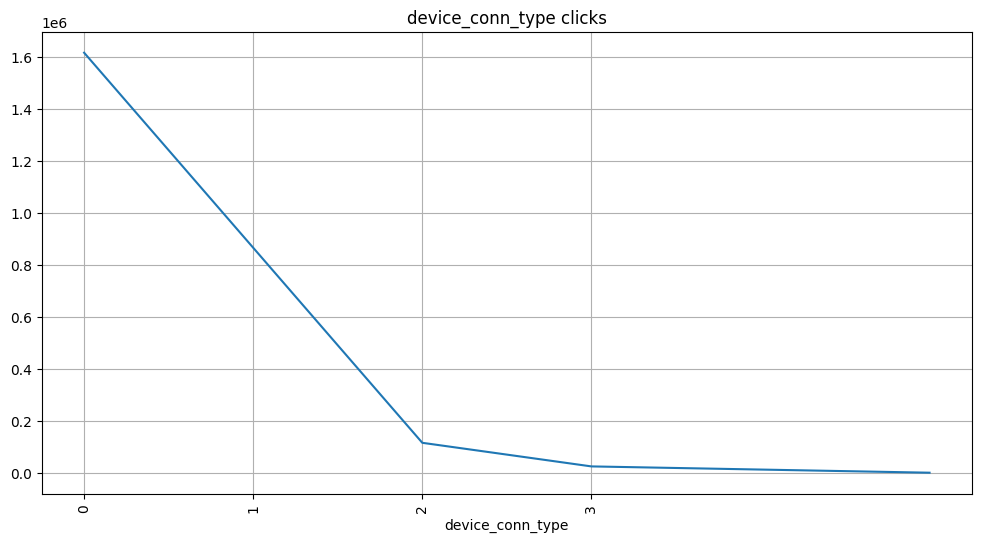

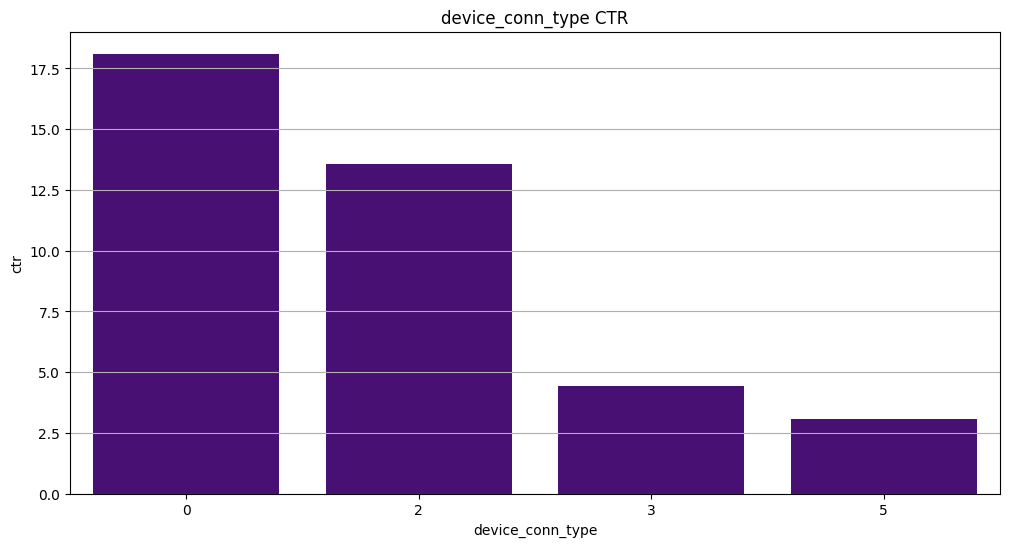

In [39]:
Top_10_clicks_visualization('device_conn_type')
Top_10_ctr_visualization('device_conn_type', Top_10_index)

In [40]:
## C14~C21 feature analysis

C:\Users\suyeon kim\AppData\Local\Temp\ipykernel_26312\1363573330.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Top_10 = (train.groupby(feature).agg({'click':'sum'})).click.sort_values(ascending=False)[:10]


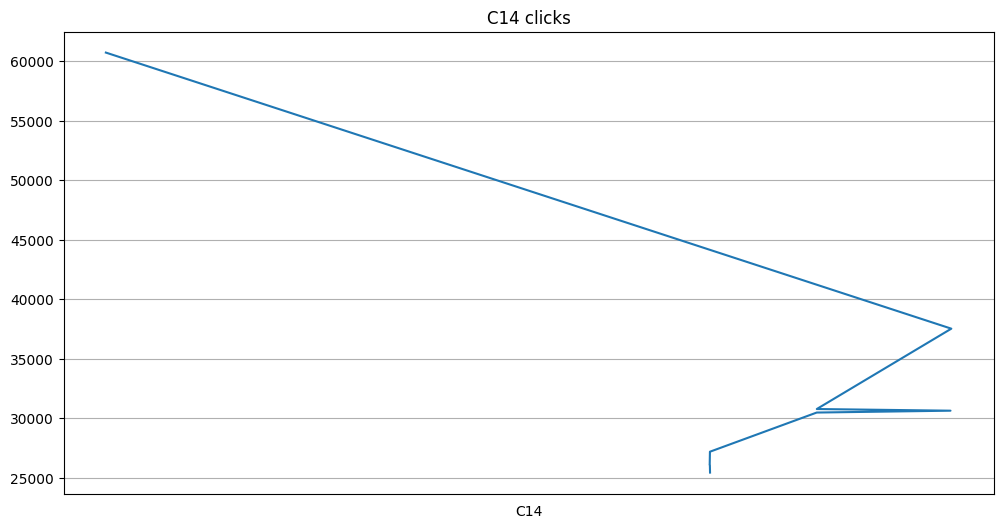

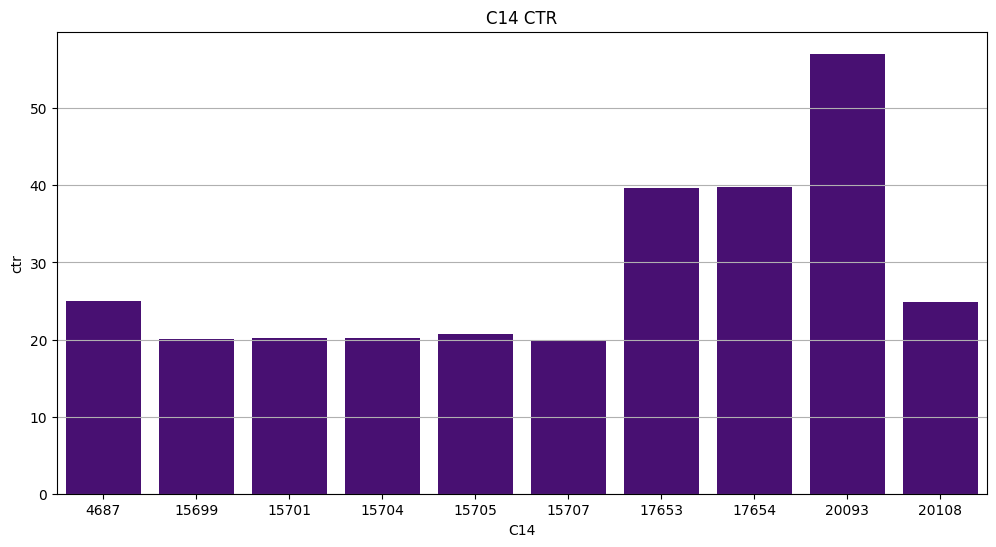

In [41]:
Top_10_clicks_visualization('C14')
Top_10_ctr_visualization('C14', Top_10_index)

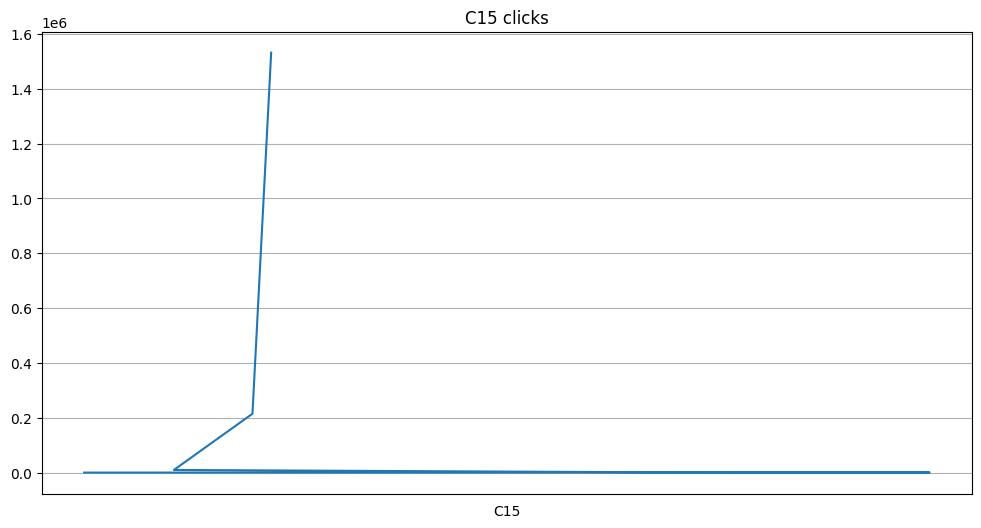

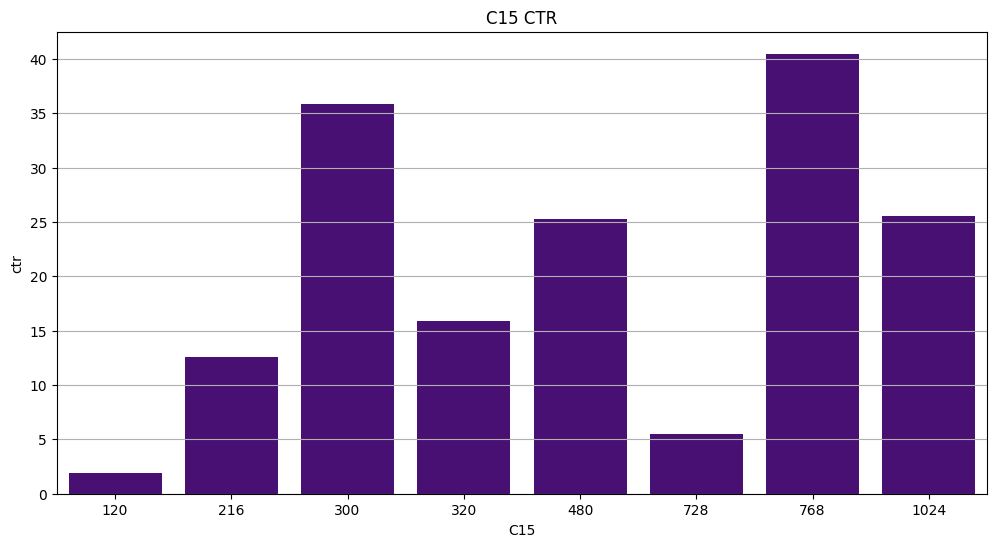

In [42]:
Top_10_clicks_visualization('C15')
Top_10_ctr_visualization('C15', Top_10_index)

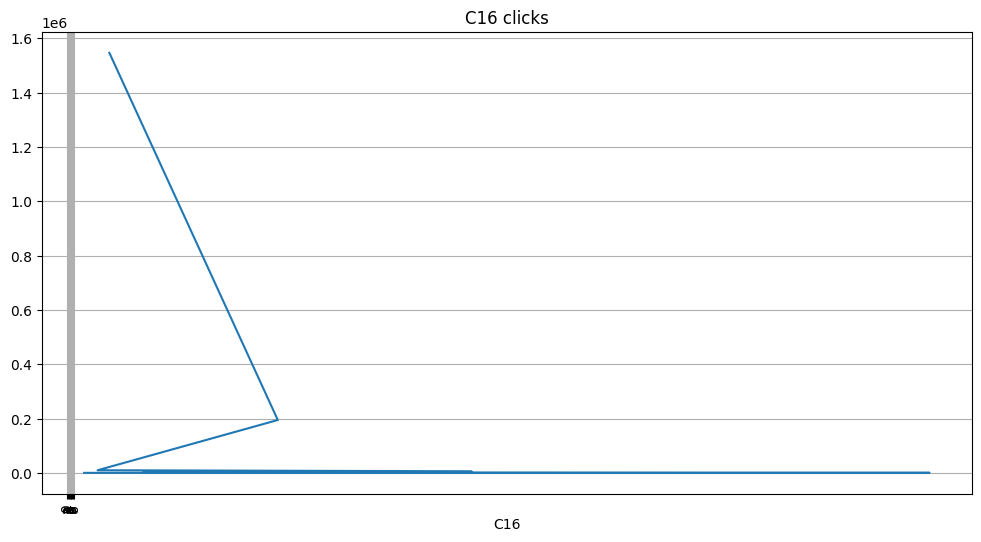

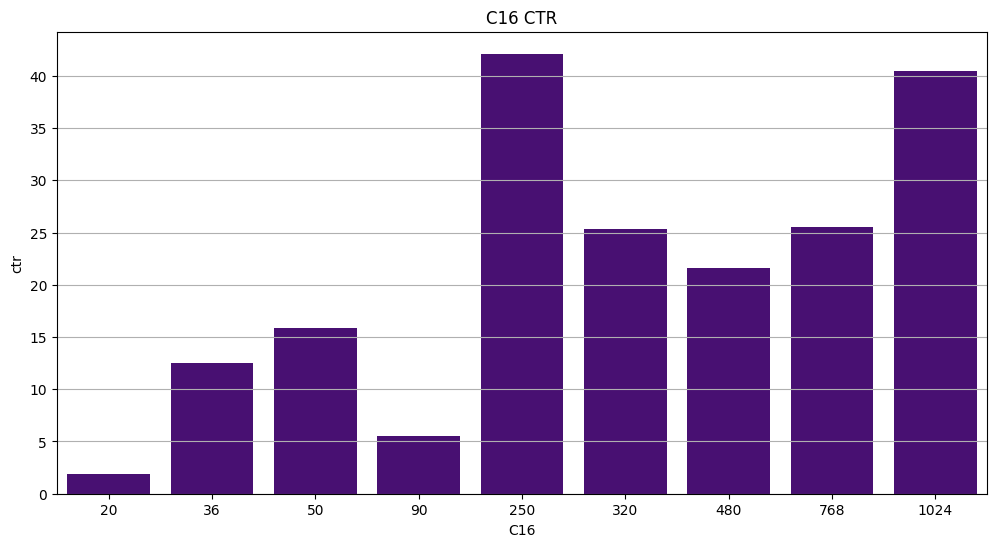

In [43]:
Top_10_clicks_visualization('C16')
Top_10_ctr_visualization('C16', Top_10_index)

C:\Users\suyeon kim\AppData\Local\Temp\ipykernel_26312\1363573330.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Top_10 = (train.groupby(feature).agg({'click':'sum'})).click.sort_values(ascending=False)[:10]


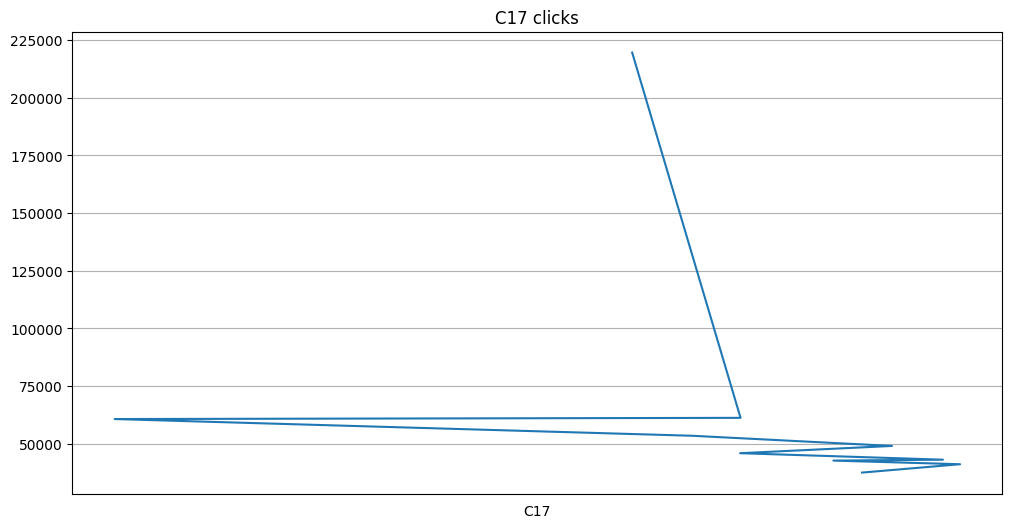

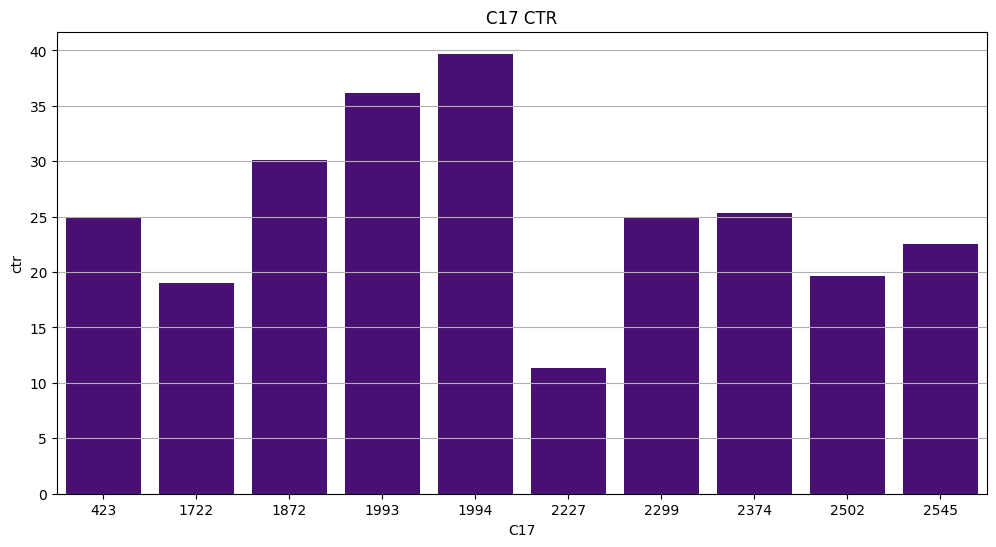

In [44]:
Top_10_clicks_visualization('C17')
Top_10_ctr_visualization('C17', Top_10_index)

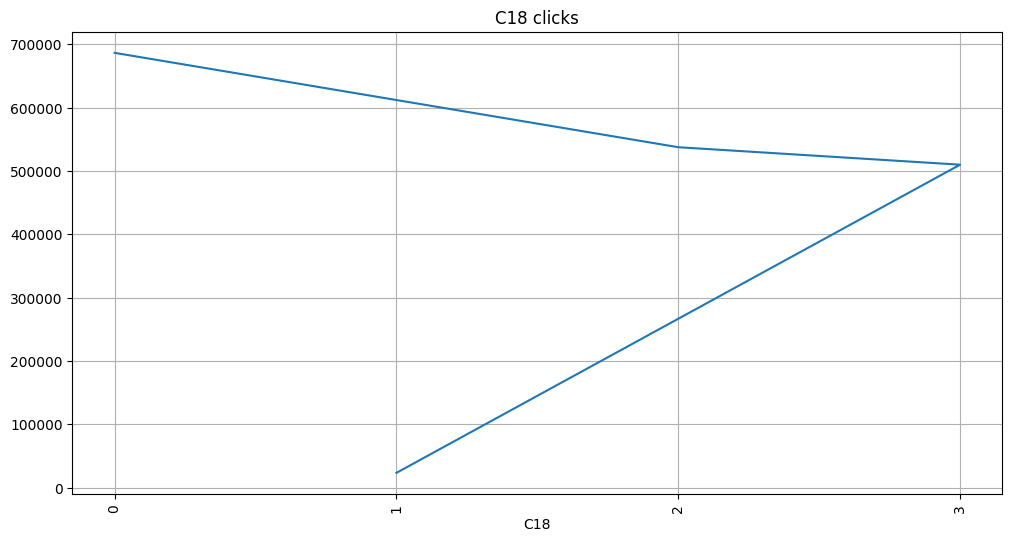

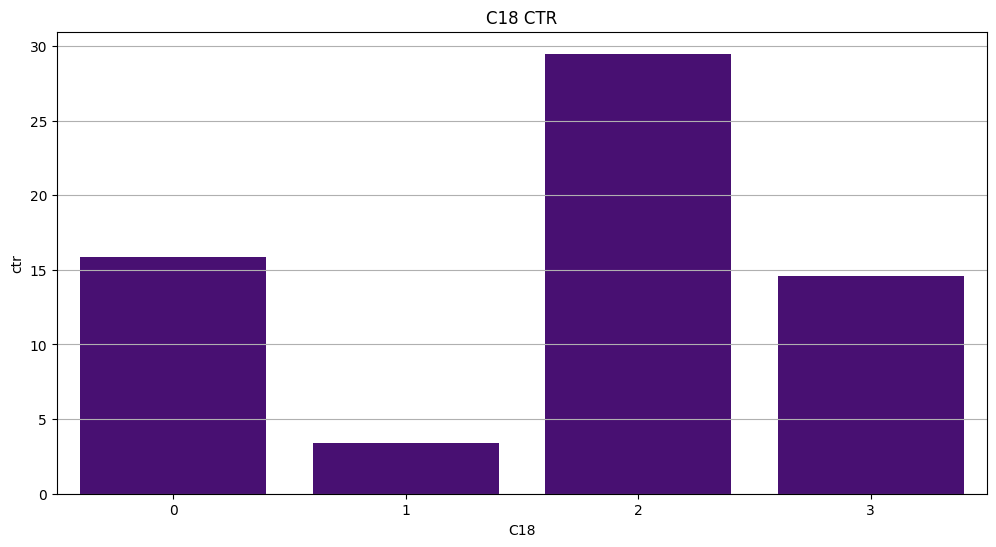

In [45]:
Top_10_clicks_visualization('C18')
Top_10_ctr_visualization('C18', Top_10_index)

C:\Users\suyeon kim\AppData\Local\Temp\ipykernel_26312\1363573330.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Top_10 = (train.groupby(feature).agg({'click':'sum'})).click.sort_values(ascending=False)[:10]


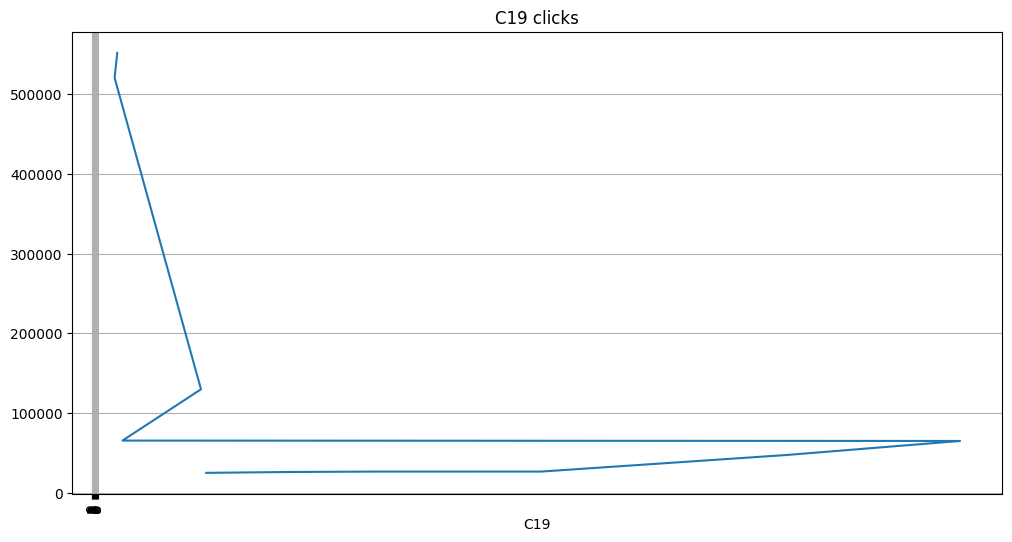

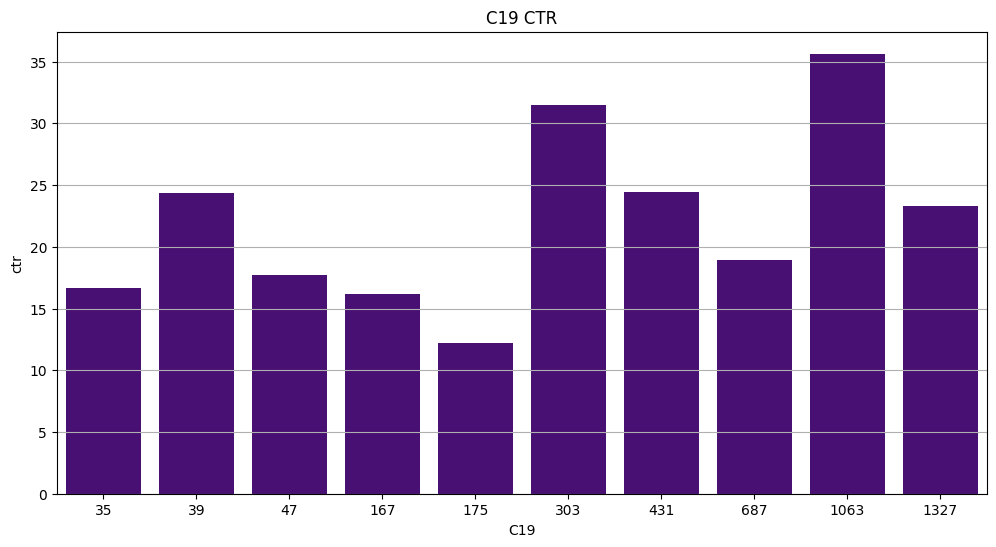

In [46]:
Top_10_clicks_visualization('C19')
Top_10_ctr_visualization('C19', Top_10_index)

C:\Users\suyeon kim\AppData\Local\Temp\ipykernel_26312\1363573330.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Top_10 = (train.groupby(feature).agg({'click':'sum'})).click.sort_values(ascending=False)[:10]


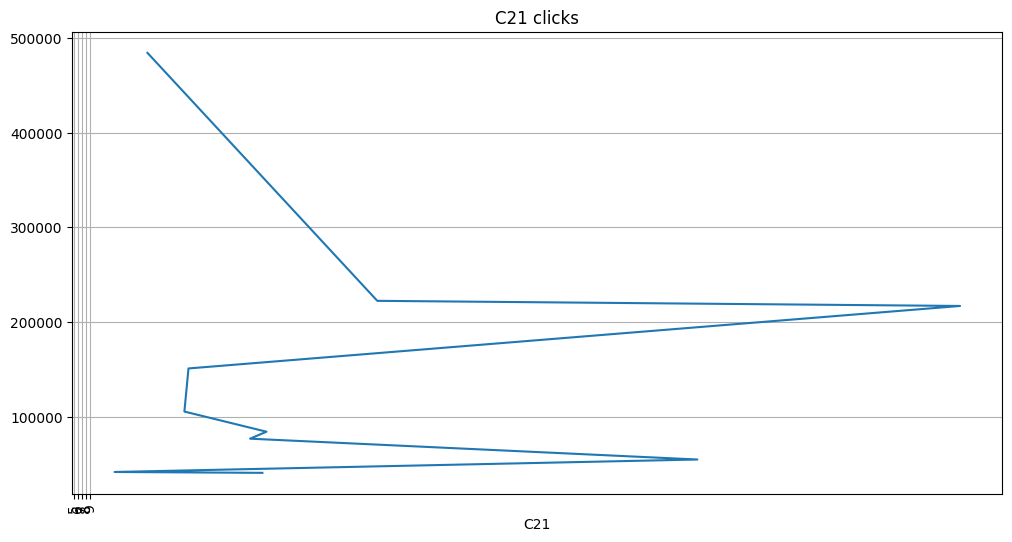

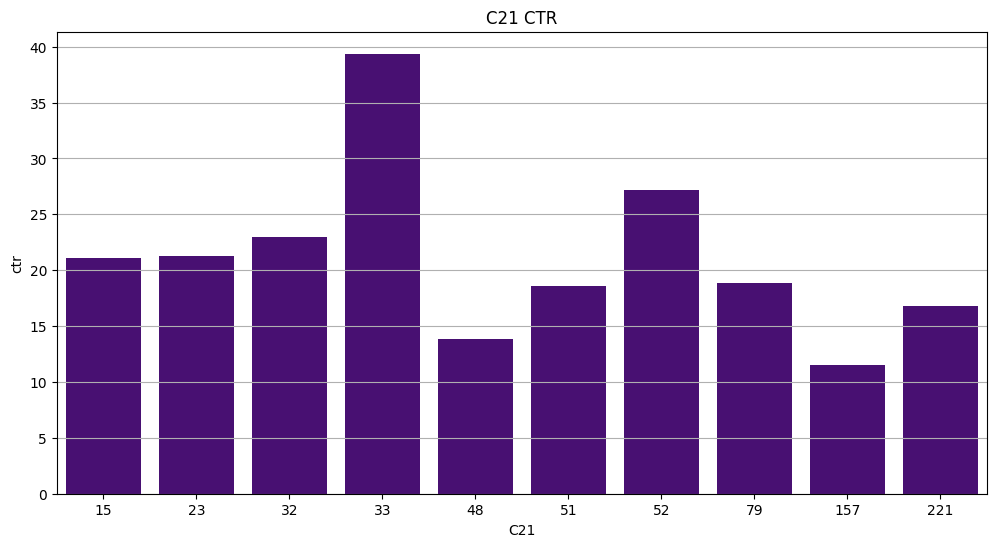

In [48]:
Top_10_clicks_visualization('C21')
Top_10_ctr_visualization('C21', Top_10_index)

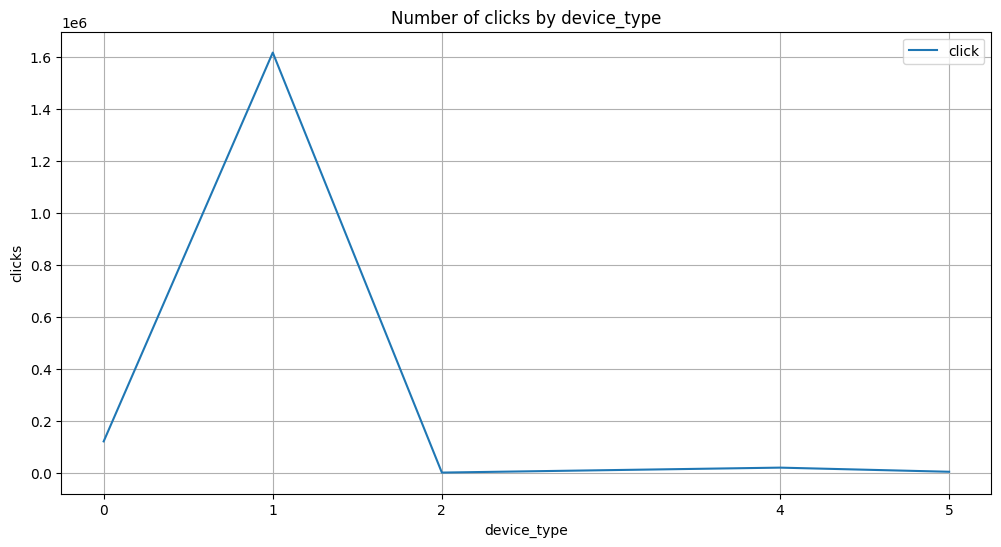

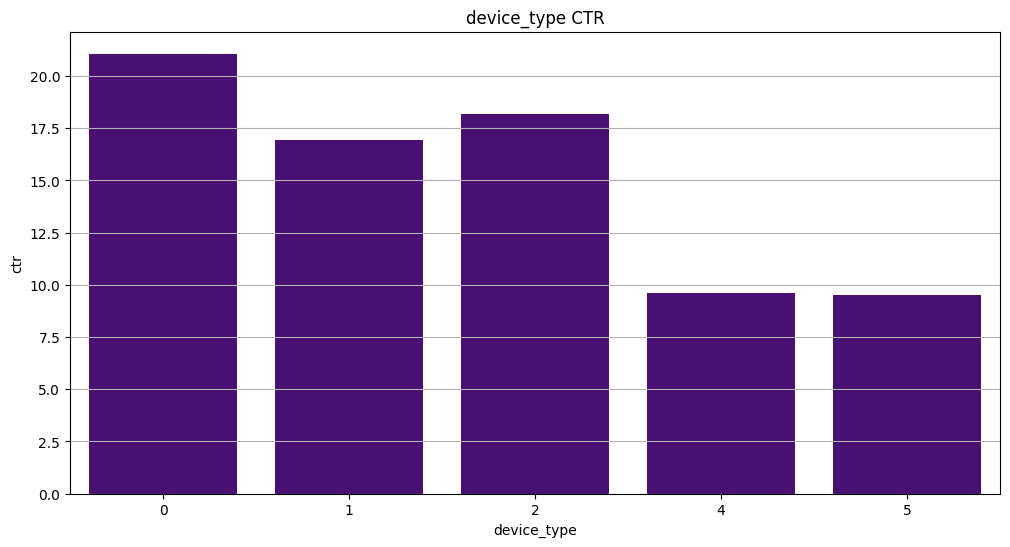

In [49]:
clicks_visualization('device_type')
ctr_visualization('device_type')

In [50]:
# 1의 device_type 클릭수가 가장 높으나 클릭률은 device_type 0이 가장 높았음

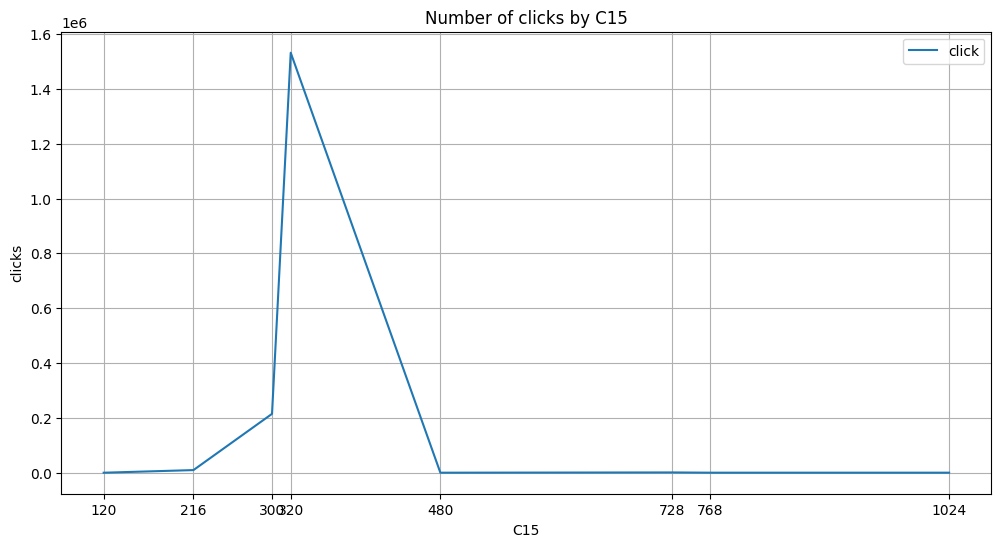

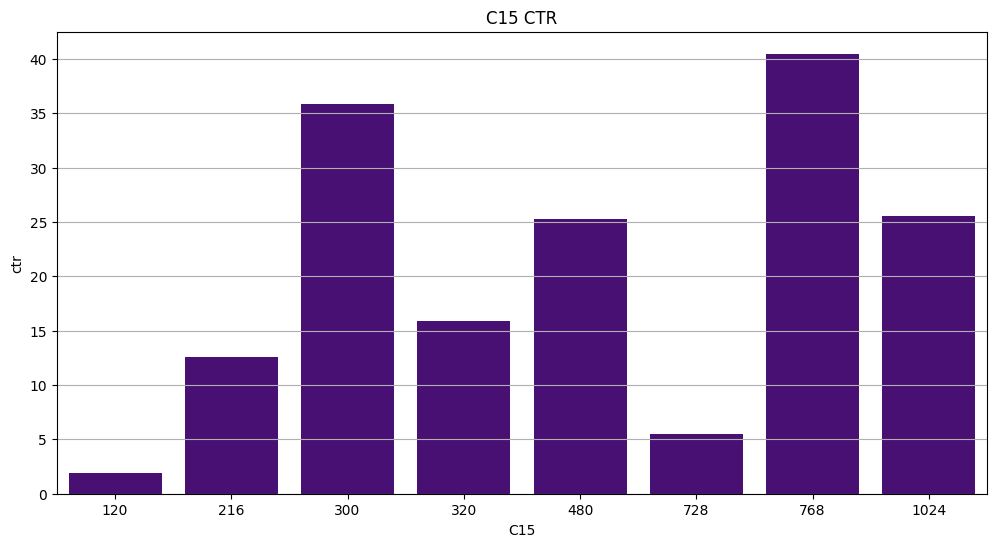

In [51]:
clicks_visualization('C15')
ctr_visualization('C15')

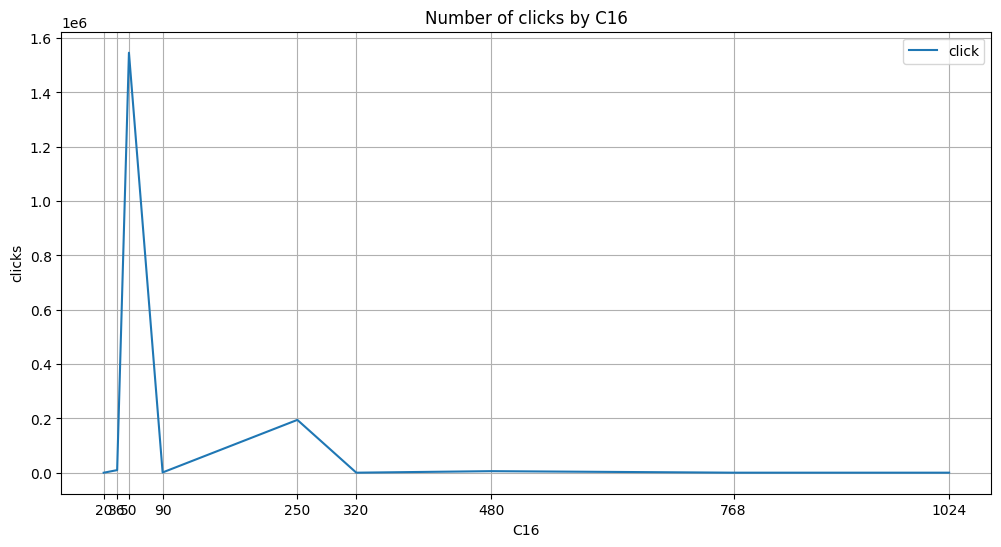

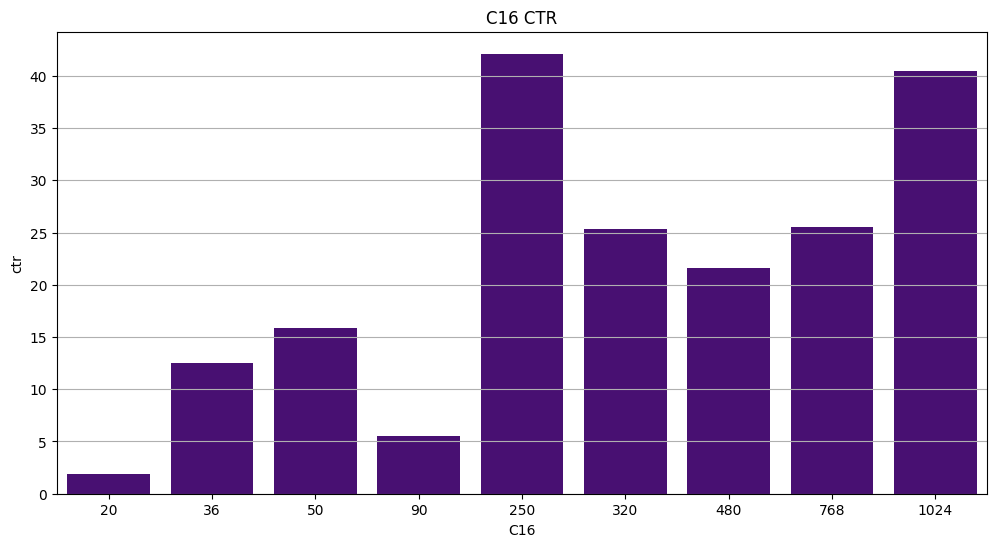

In [52]:
clicks_visualization('C16')
ctr_visualization('C16')

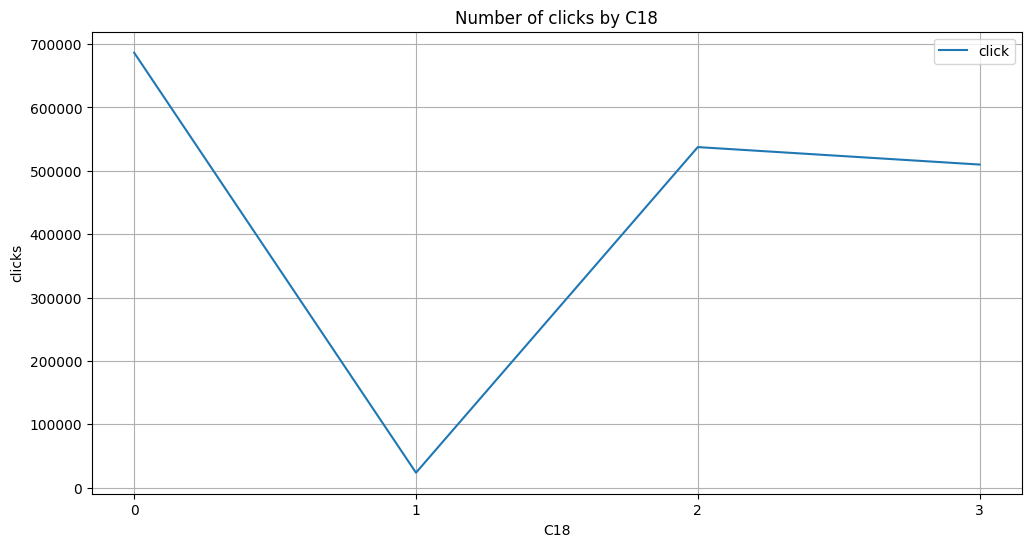

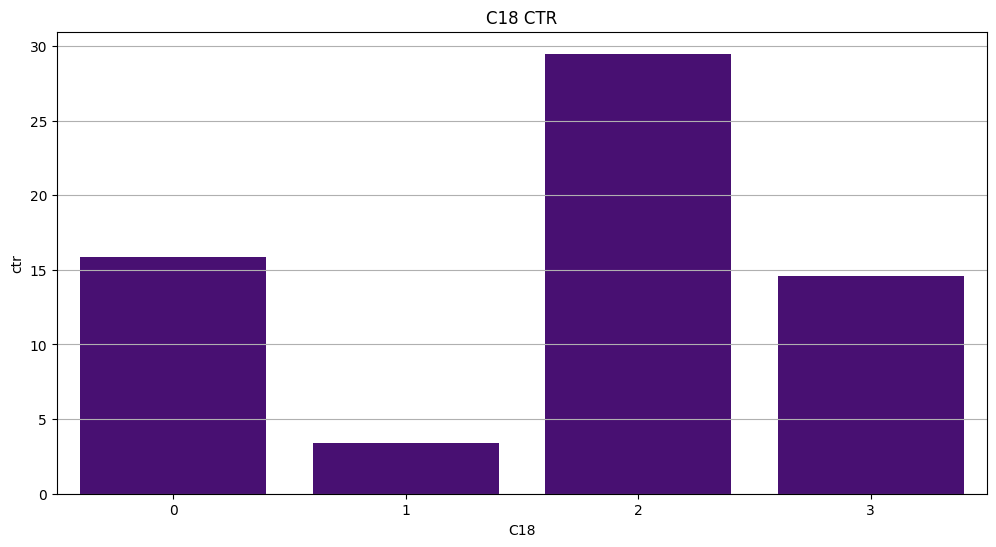

In [53]:
clicks_visualization('C18')
ctr_visualization('C18')

In [54]:
base = train[target].mode()[0]
baseline = len(train) * [base]
accuracy_score = accuracy_score(train[target], baseline)

accuracy_score

0.8301943397243661

In [55]:
def drop_error(X):
        X = X.drop('hour', axis=1)
        return X

In [56]:
X_train = drop_error(X_train)
X_train.head()

,id,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,Day_of_week,Time_of_day
3175483,1.327104e+19,1010,1,85f751fd,c4e18dd6,50e219e0,d1e438f6,7801e8d9,0f2161f8,250d1d77,803715f7,a5fbe35d,4,0,17875,320,50,2036,3,47,-1,156,1,17
13066898,6.296806e+17,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,cc9858ab,6d44e29a,1,0,18858,320,50,1882,3,35,-1,13,1,14
6997095,1.045719e+19,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,110ed063,b4b19c97,1,0,21611,320,50,2480,3,297,100111,61,5,10
15775959,1.658073e+19,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,0f2161f8,a99f214a,699f69bd,1b13b020,1,0,16688,320,50,1873,3,39,-1,23,6,3
14557853,5.857047e+18,1005,1,178a7b89,b4598159,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,6534d06b,6e1e2240,1,0,16208,320,50,1800,3,167,100075,23,1,6


In [57]:
X_val = drop_error(X_val)
X_val.head()

,id,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,Day_of_week,Time_of_day
4062228,1.494082e+19,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,42a3bc47,44801bc1,1,0,15701,320,50,1722,0,35,-1,79,5,14
2143557,1.305607e+19,1005,0,85f751fd,c4e18dd6,50e219e0,08b5f605,33da2e74,dc97ec06,a99f214a,d0ec7501,8b65b455,1,0,20392,320,50,2340,3,41,100111,159,5,0
7958080,7.988753e+18,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,a99f214a,c8eddfa8,1f0bc64f,1,0,21767,320,50,2506,0,35,-1,157,2,10
8991647,6.375885e+18,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,8151444d,d4897fef,1,0,21894,320,50,2526,0,35,-1,221,2,10
7985790,8.124519e+18,1005,0,6256f5b4,28f93029,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,b965c113,64fdf136,1,0,17877,320,50,2036,3,47,100034,156,2,19


In [58]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

watchlist = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=3, 
)

C:\Users\suyeon kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.67363	validation_1-auc:0.67373
[1]	validation_0-auc:0.67882	validation_1-auc:0.67958
[2]	validation_0-auc:0.68165	validation_1-auc:0.68337
[3]	validation_0-auc:0.68217	validation_1-auc:0.68298
[4]	validation_0-auc:0.68354	validation_1-auc:0.68489
[5]	validation_0-auc:0.68373	validation_1-auc:0.68474
[6]	validation_0-auc:0.68517	validation_1-auc:0.68632
[7]	validation_0-auc:0.68936	validation_1-auc:0.68997
[8]	validation_0-auc:0.69222	validation_1-auc:0.69240
[9]	validation_0-auc:0.69442	validation_1-auc:0.69433
[10]	validation_0-auc:0.69587	validation_1-auc:0.69596
[11]	validation_0-auc:0.69897	validation_1-auc:0.69870
[12]	validation_0-auc:0.70010	validation_1-auc:0.69969
[13]	validation_0-auc:0.70111	validation_1-auc:0.70071
[14]	validation_0-auc:0.70307	validation_1-auc:0.70289
[15]	validation_0-auc:0.70384	validation_1-auc:0.70369
[16]	validation_0-auc:0.70603	validation_1-auc:0.70586
[17]	validation_0-auc:0.70640	validation_1-auc:0.70604
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=987654321,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

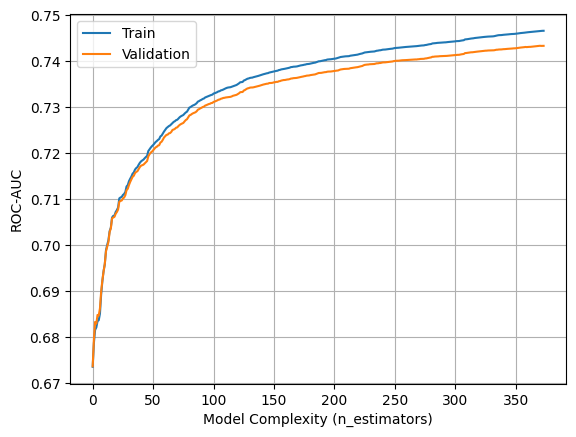

In [59]:
results = model.evals_result()
train_error = results["validation_0"]["auc"]
val_error = results["validation_1"]["auc"]

plt.plot(train_error, label="Train")
plt.plot(val_error, label="Validation")
plt.ylabel("ROC-AUC")
plt.xlabel("Model Complexity (n_estimators)")
plt.legend()

In [60]:
print("검증 정확도", model.score(X_val_encoded, y_val))

print(
    classification_report(
        y_val, model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    )
)

검증 정확도 0.8342385990243691
              precision    recall  f1-score   support

           0       0.84      0.99      0.91   2148090
           1       0.61      0.07      0.12    439364

    accuracy                           0.83   2587454
   macro avg       0.72      0.53      0.52   2587454
weighted avg       0.80      0.83      0.78   2587454



In [61]:
model.predict(X_val_encoded, iteration_range=(0, model.best_iteration)).sum()

49614

In [62]:
def get_roc_auc(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred_proba = model.predict_proba(
            X_val_encoded, iteration_range=(0, model.best_iteration)
        )[:, 1]
    else:
        y_pred_proba = model.predict_proba(X_val_encoded)[:, 1]

    print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))

    baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    tmp = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'thresholds': thresholds})
    plt.plot(
        baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline"
    )
    plt.plot(fpr, tpr, color="blue", label="Model")
    plt.scatter(fpr, tpr, color="red")
    plt.legend()
    plt.title("ROC curve")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    return tmp

ROC-AUC: 0.7433159568753674


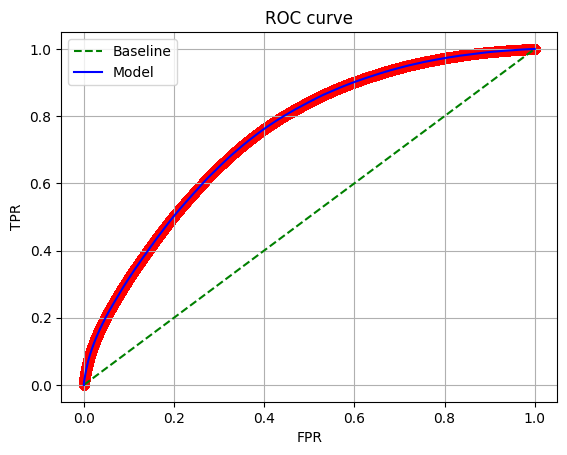

,fpr,tpr,thresholds
0,0.000000,0.000000,1.926349
1,0.000000,0.000002,0.926349
2,0.000000,0.000034,0.891177
3,0.000000,0.000064,0.887657
4,0.000000,0.000107,0.884858
...,...,...,...
861671,0.999993,1.000000,0.002002
861672,0.999996,1.000000,0.002001
861673,0.999997,1.000000,0.001991
861674,0.999999,1.000000,0.001978


In [63]:
get_roc_auc(model, X_val_encoded, y_val)

In [64]:
def plot_confusion_matrix(model, X_val_encoded, y_val):
    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')
    plt.show()

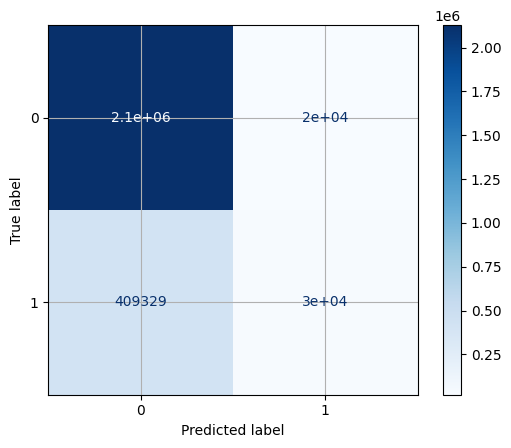

In [65]:
plot_confusion_matrix(model, X_val_encoded, y_val)

In [66]:
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_val == 0).sum() / (y_val == 1).sum(),
)

watchlist = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=5,  
)

C:\Users\suyeon kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.67497	validation_1-auc:0.67411
[1]	validation_0-auc:0.68218	validation_1-auc:0.68091
[2]	validation_0-auc:0.68397	validation_1-auc:0.68370
[3]	validation_0-auc:0.68934	validation_1-auc:0.68898
[4]	validation_0-auc:0.69320	validation_1-auc:0.69307
[5]	validation_0-auc:0.69500	validation_1-auc:0.69514
[6]	validation_0-auc:0.69678	validation_1-auc:0.69702
[7]	validation_0-auc:0.69760	validation_1-auc:0.69777
[8]	validation_0-auc:0.69975	validation_1-auc:0.69993
[9]	validation_0-auc:0.69991	validation_1-auc:0.70000
[10]	validation_0-auc:0.70166	validation_1-auc:0.70159
[11]	validation_0-auc:0.70286	validation_1-auc:0.70283
[12]	validation_0-auc:0.70332	validation_1-auc:0.70328
[13]	validation_0-auc:0.70541	validation_1-auc:0.70511
[14]	validation_0-auc:0.70596	validation_1-auc:0.70565
[15]	validation_0-auc:0.70647	validation_1-auc:0.70622
[16]	validation_0-auc:0.70793	validation_1-auc:0.70765
[17]	validation_0-auc:0.70871	validation_1-auc:0.70818
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=987654321,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
def summarize_results(model, X_val_encoded, y_val):
    # 1. Train / Val Loss Plot
    if isinstance(model, XGBClassifier):
        results = model.evals_result()
        tgts = results["validation_0"].keys()

        for tgt in tgts:
            train_error = results["validation_0"][tgt]
            val_error = results["validation_1"][tgt]

            plt.plot(train_error, label="Train")
            plt.plot(val_error, label="Validation")
            plt.ylabel(tgt)
            plt.xlabel("Model Complexity (n_estimators)")
            plt.legend()
            plt.show()

    # 2. Accuracy / Classification Report
    print("검증 정확도", model.score(X_val_encoded, y_val))

    if isinstance(model, XGBClassifier):
        y_pred = model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    else:
        y_pred = model.predict(X_val_encoded)

    print(classification_report(y_val, y_pred))

    # 3. ROC-AUC
    get_roc_auc(model, X_val_encoded, y_val)

    # 4. Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_val_encoded, y_val,cmap='Blues')
    plt.show()

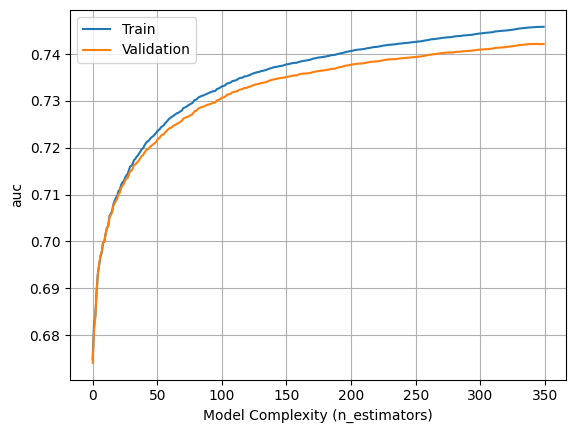

검증 정확도 0.6420925743993903
              precision    recall  f1-score   support

           0       0.92      0.62      0.74   2148090
           1       0.29      0.74      0.41    439364

    accuracy                           0.64   2587454
   macro avg       0.60      0.68      0.58   2587454
weighted avg       0.81      0.64      0.69   2587454

ROC-AUC: 0.7421718364067216


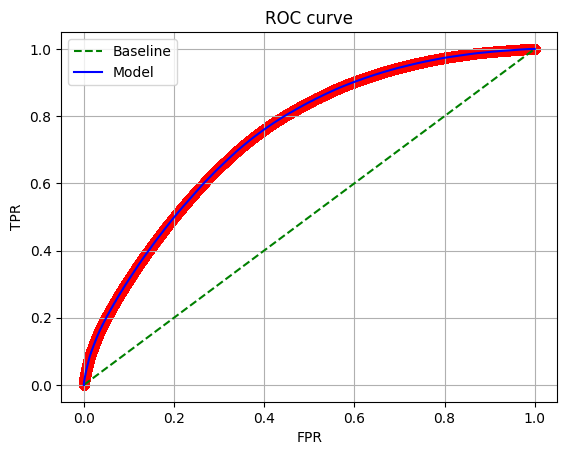

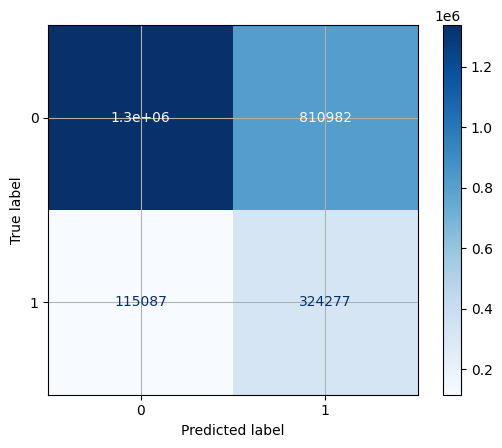

In [68]:
summarize_results(model, X_val_encoded, y_val)

In [69]:
model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

X_train_sampled, y_train_sampled = RandomUnderSampler(random_state=42).fit_resample(
    X_train_encoded, y_train
)

In [70]:
y_train_sampled.value_counts()

0    1757457
1    1757457
Name: click, dtype: int64

In [71]:
watchlist = [(X_train_sampled, y_train_sampled), (X_val_encoded, y_val)]

model.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=3, 
)

C:\Users\suyeon kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.67463	validation_1-auc:0.67314
[1]	validation_0-auc:0.68134	validation_1-auc:0.68010
[2]	validation_0-auc:0.68368	validation_1-auc:0.68348
[3]	validation_0-auc:0.68839	validation_1-auc:0.68814
[4]	validation_0-auc:0.69328	validation_1-auc:0.69304
[5]	validation_0-auc:0.69400	validation_1-auc:0.69369
[6]	validation_0-auc:0.69599	validation_1-auc:0.69602
[7]	validation_0-auc:0.69702	validation_1-auc:0.69717
[8]	validation_0-auc:0.69964	validation_1-auc:0.69970
[9]	validation_0-auc:0.69986	validation_1-auc:0.69993
[10]	validation_0-auc:0.70154	validation_1-auc:0.70175
[11]	validation_0-auc:0.70255	validation_1-auc:0.70272
[12]	validation_0-auc:0.70408	validation_1-auc:0.70438
[13]	validation_0-auc:0.70473	validation_1-auc:0.70504
[14]	validation_0-auc:0.70531	validation_1-auc:0.70558
[15]	validation_0-auc:0.70607	validation_1-auc:0.70607
[16]	validation_0-auc:0.70817	validation_1-auc:0.70790
[17]	validation_0-auc:0.70866	validation_1-auc:0.70857
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=987654321,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

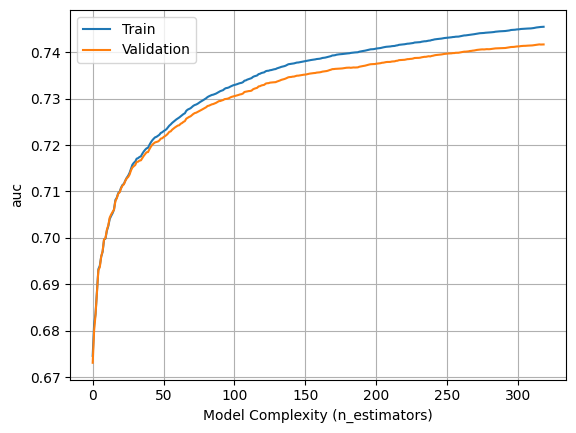

검증 정확도 0.6445907830631965
              precision    recall  f1-score   support

           0       0.92      0.63      0.75   2148090
           1       0.29      0.73      0.41    439364

    accuracy                           0.64   2587454
   macro avg       0.60      0.68      0.58   2587454
weighted avg       0.81      0.64      0.69   2587454

ROC-AUC: 0.7416021927642762


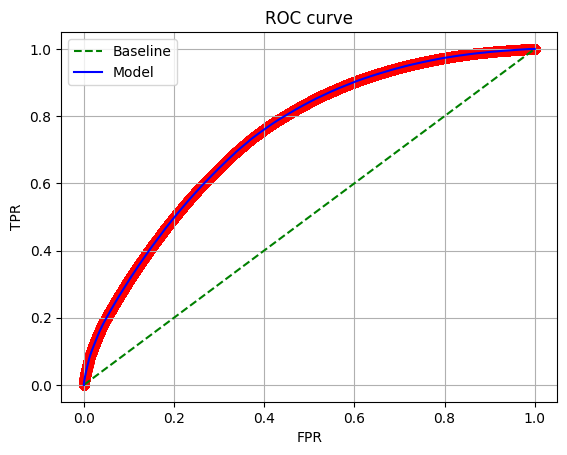

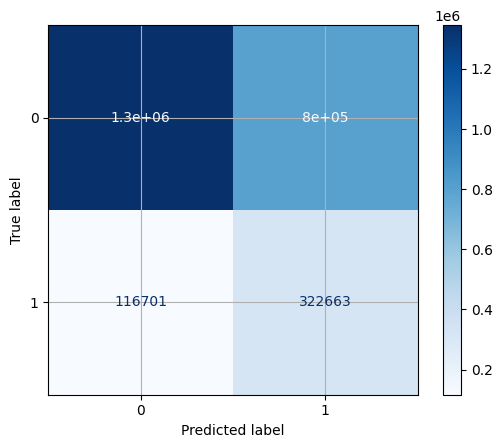

In [72]:
summarize_results(model, X_val_encoded, y_val)

In [85]:
# 데이터가 너무 커서 모델링에서 오류가 남
train_modeling, train_not_modeling = train_test_split(train, test_size=0.99, stratify=train[target], random_state=42)
train_minimal, val_minimal = train_test_split(train_modeling, test_size=0.2, stratify=train_modeling[target], random_state=42)

features = train_minimal.drop(target, axis=1).columns

X_train_minimal, y_train_minimal = train_minimal[features], train_minimal[target]
X_val_minimal, y_val_minimal = val_minimal[features], val_minimal[target]

In [91]:
def fit(X_train, y_train):
    pipeline = make_pipeline(
        OrdinalEncoder(),
        XGBClassifier(
            random_state=42,
            n_jobs=-1,
        ),
    )

    params = {
        "xgbclassifier__max_depth": [2, 4, 6],
        "xgbclassifier__min_child_weight": [2, 4, 8],
        "xgbclassifier__colsample_bytree": uniform(loc=0.5, scale=0.5),
    }

    clf = RandomizedSearchCV(
        pipeline,
        param_distributions=params,
        scoring="roc_auc",
        n_iter=10,
        cv=5,
        random_state=42,
        
    )

    clf.fit(X_train, y_train)
    print("Optimal Hyperparameter:", clf.best_params_)
    print("AUC:", clf.best_score_)

    return clf


def predict(X, y, best_estimator):
    y_pred_proba = best_estimator.predict_proba(X)[:,1]

    report = classification_report(y, y_pred_proba > 0.5)
    return y_pred_proba, report


def plot_roc(y, y_pred_proba):
    auc_score = roc_auc_score(y, y_pred_proba)
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    baseline_fpr, baseline_tpr, _ = roc_curve(y, [0] * len(y))

    plt.style.use("ggplot")
    plt.plot(fpr, tpr, label="Model")
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
    plt.xlabel("False Positive Rate", size=12)
    plt.ylabel("True Positive Rate", size=12)
    plt.title("Receiver Operating Characteristic")
    plt.legend(prop={"size": 12})
    plt.show()
    return auc_score

In [ ]:
X_train_minimal = drop_error(X_train_minimal)

In [95]:
clf = fit(X_train_minimal, y_train_minimal)

Optimal Hyperparameter: {'xgbclassifier__colsample_bytree': 0.6872700594236812, 'xgbclassifier__max_depth': 2, 'xgbclassifier__min_child_weight': 8}
AUC: 0.6959852366971708


In [97]:
X_val_minimal = drop_error(X_val_minimal)

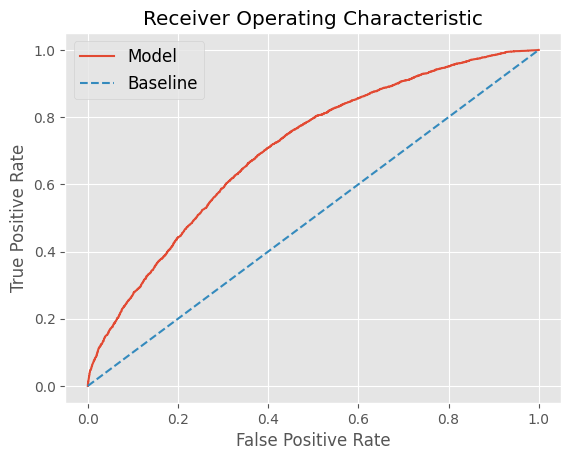

In [99]:
y_val_pred_proba, report = predict(X_val_minimal, y_val_minimal, clf.best_estimator_)
auc_score = plot_roc(y_val_minimal, y_val_pred_proba)

In [165]:
auc_score

0.7046465064516303

검증 정확도 0.8328502415458937
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     17185
           1       0.66      0.03      0.06      3515

    accuracy                           0.83     20700
   macro avg       0.75      0.51      0.48     20700
weighted avg       0.80      0.83      0.76     20700

ROC-AUC: 0.7046465064516303


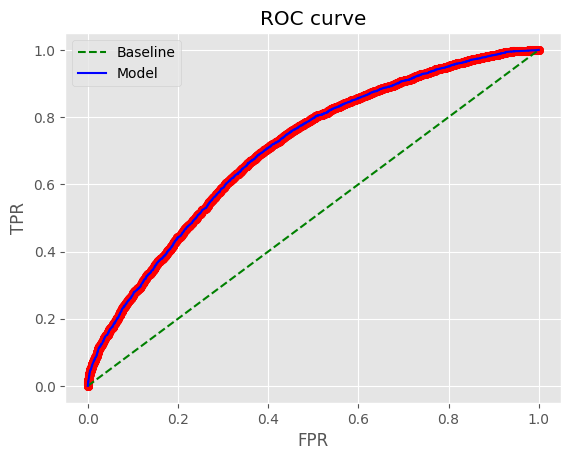

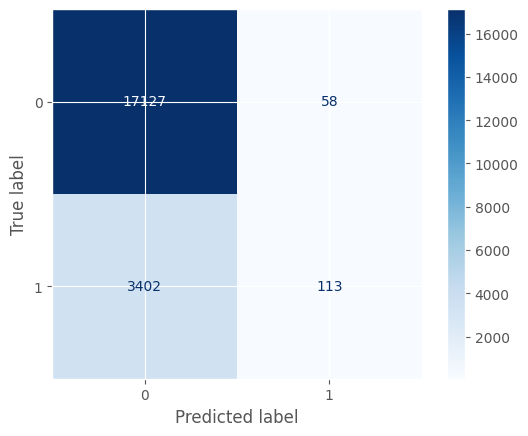

In [100]:
summarize_results(clf.best_estimator_, X_val_minimal, y_val_minimal)

In [101]:
def fit(X_train, y_train):
    pipeline = make_pipeline(
        BinaryEncoder(),
        XGBClassifier(
            random_state=42,
            n_jobs=-1,
        ),
    )

    params = {
        "xgbclassifier__max_depth": [2, 4, 6],
        "xgbclassifier__min_child_weight": [2, 4, 8],
        "xgbclassifier__colsample_bytree": uniform(loc=0.5, scale=0.5),
    }

    clf = RandomizedSearchCV(
        pipeline,
        param_distributions=params,
        scoring="roc_auc",
        n_iter=10,
        cv=5,
        random_state=42,
        
    )

    clf.fit(X_train, y_train)
    print("Optimal Hyperparameter:", clf.best_params_)
    print("AUC:", clf.best_score_)

    return clf

In [102]:
clf = fit(X_train_minimal, y_train_minimal)

Optimal Hyperparameter: {'xgbclassifier__colsample_bytree': 0.8059264473611898, 'xgbclassifier__max_depth': 4, 'xgbclassifier__min_child_weight': 8}
AUC: 0.7145798939445914


검증 정확도 0.8337681159420289
              precision    recall  f1-score   support

           0       0.84      0.99      0.91     17185
           1       0.64      0.05      0.09      3515

    accuracy                           0.83     20700
   macro avg       0.74      0.52      0.50     20700
weighted avg       0.80      0.83      0.77     20700

ROC-AUC: 0.7121201997673215


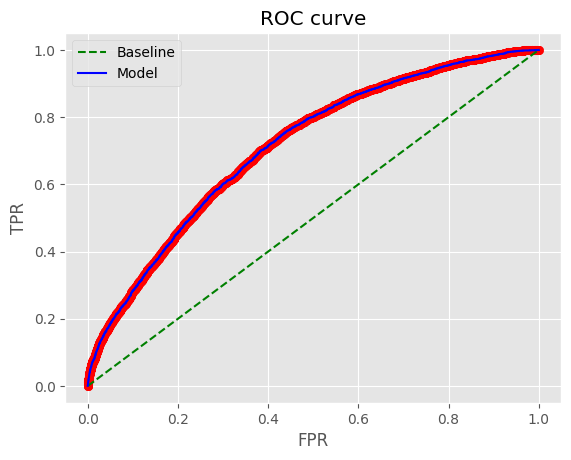

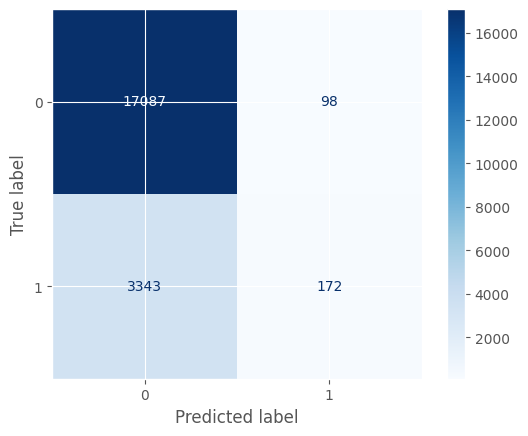

In [104]:
summarize_results(clf.best_estimator_, X_val_minimal, y_val_minimal)

In [169]:
X_test = drop_error(X_test)

              precision    recall  f1-score   support

           0       0.84      0.99      0.91   2685113
           1       0.58      0.04      0.08    549205

    accuracy                           0.83   3234318
   macro avg       0.71      0.52      0.49   3234318
weighted avg       0.79      0.83      0.77   3234318



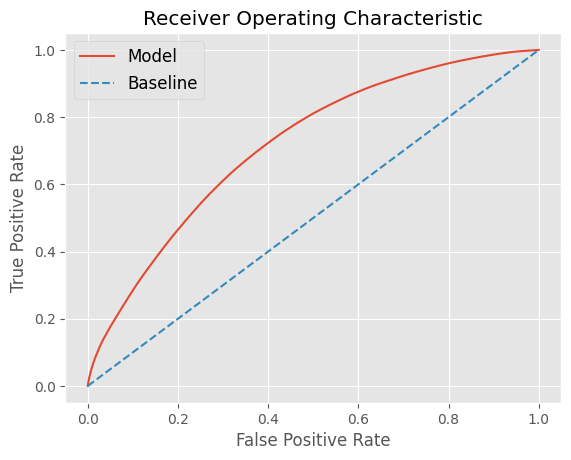

In [170]:
y_test_pred_proba, report = predict(X_test, y_test, clf.best_estimator_)
print(report)
auc_score = plot_roc(y_test, y_test_pred_proba)